In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
f = open("monthly_json.json", "r") # öffnet die Datei
file_content = f.read(500) # liest die ersten 100 Zeichen der Datei
file_content

'[{"Date": "2016-12-06", "Mean": 0.7895, "Source": "GCAG"},{"Date": "2016-12-06", "Mean": 0.81, "Source": "GISTEMP"},{"Date": "2016-11-06", "Mean": 0.7504, "Source": "GCAG"},{"Date": "2016-11-06", "Mean": 0.93, "Source": "GISTEMP"},{"Date": "2016-10-06", "Mean": 0.7292, "Source": "GCAG"},{"Date": "2016-10-06", "Mean": 0.89, "Source": "GISTEMP"},{"Date": "2016-09-06", "Mean": 0.8767, "Source": "GCAG"},{"Date": "2016-09-06", "Mean": 0.87, "Source": "GISTEMP"},{"Date": "2016-08-06", "Mean": 0.8998, '

In [3]:
data = pd.read_json("monthly_json.json") 

In [4]:
data.head()

Date    Mean   Source
0 2016-12-06  0.7895     GCAG
1 2016-12-06  0.8100  GISTEMP
2 2016-11-06  0.7504     GCAG
3 2016-11-06  0.9300  GISTEMP
4 2016-10-06  0.7292     GCAG

In [5]:
pivot_df = data.pivot(index='Date', columns='Source', values='Mean')
pivot_df.head()

Source        GCAG  GISTEMP
Date                       
1880-01-06  0.0009    -0.30
1880-02-06 -0.1229    -0.21
1880-03-06 -0.1357    -0.18
1880-04-06 -0.0499    -0.27
1880-05-06 -0.0738    -0.14

In [6]:
# Zeitwerte für x
GCAG_data = pivot_df["GCAG"]
x = GCAG_data.index.values.astype(np.int64) / 100000000
x = x.reshape(-1,1)
x

array([[-2.8397088e+10],
       [-2.8370304e+10],
       [-2.8345248e+10],
       ...,
       [ 1.4757120e+10],
       [ 1.4783904e+10],
       [ 1.4809824e+10]])

In [7]:
# Temperaturwerte für y
y = pivot_df["GCAG"].values
y


array([ 0.0009, -0.1229, -0.1357, ...,  0.7292,  0.7504,  0.7895])

In [8]:
# Anwendung von KNR für Temperaturdaten
knr = KNeighborsRegressor (n_neighbors= 2, weights = "uniform", algorithm = "brute").fit(x,y)

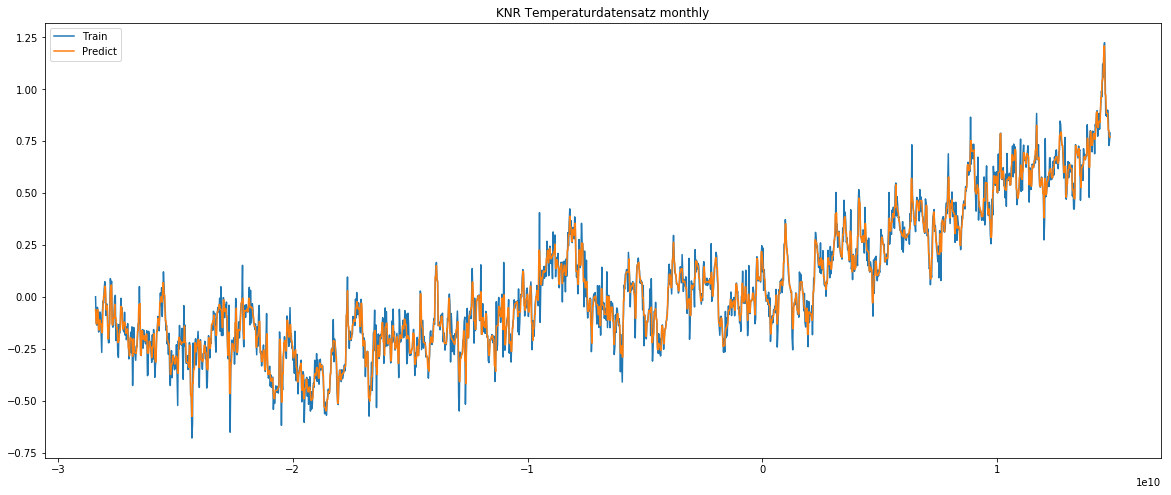

In [9]:
# Predicten der Temperatur basierend auf den Zeitwerten
data_df = pd.DataFrame(GCAG_data)
data_df["KNR"] = knr.predict(x)
data_df

plt.figure(figsize =(20,8))
plt.plot(x, pivot_df["GCAG"], label = "Train")
plt.plot(x, data_df["KNR"], label = "Predict")
plt.legend(loc="upper left")
plt.title("KNR Temperaturdatensatz monthly")
plt.show()



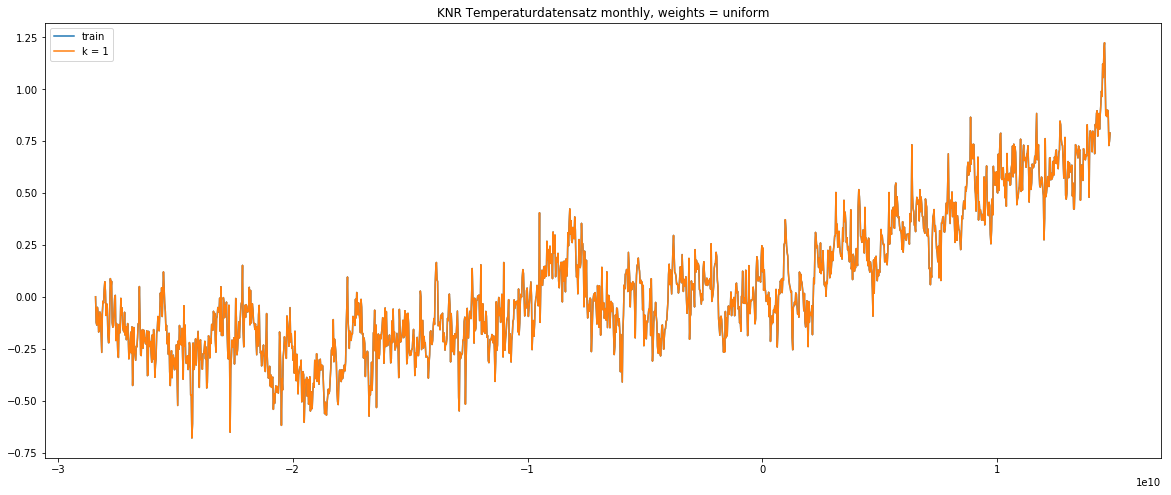

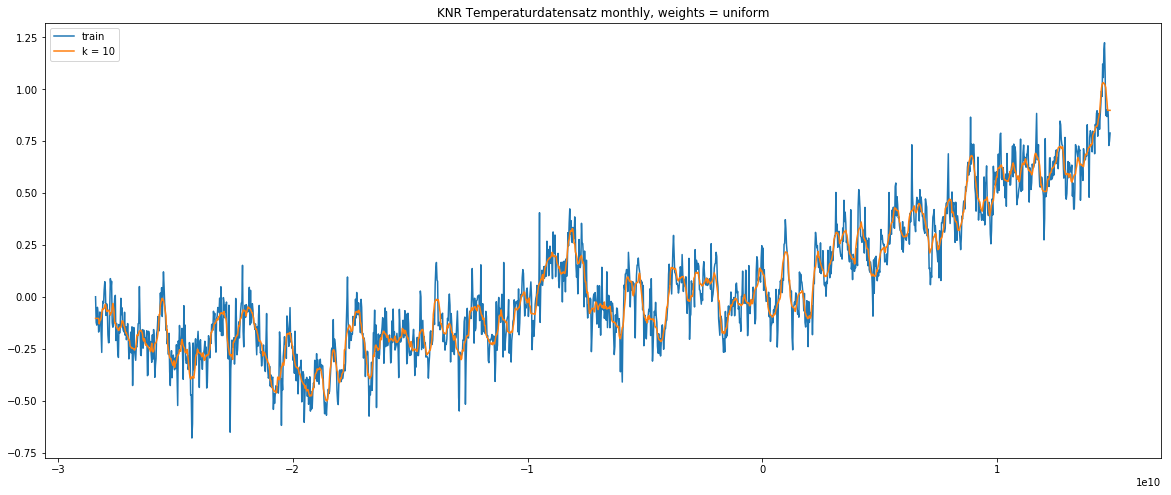

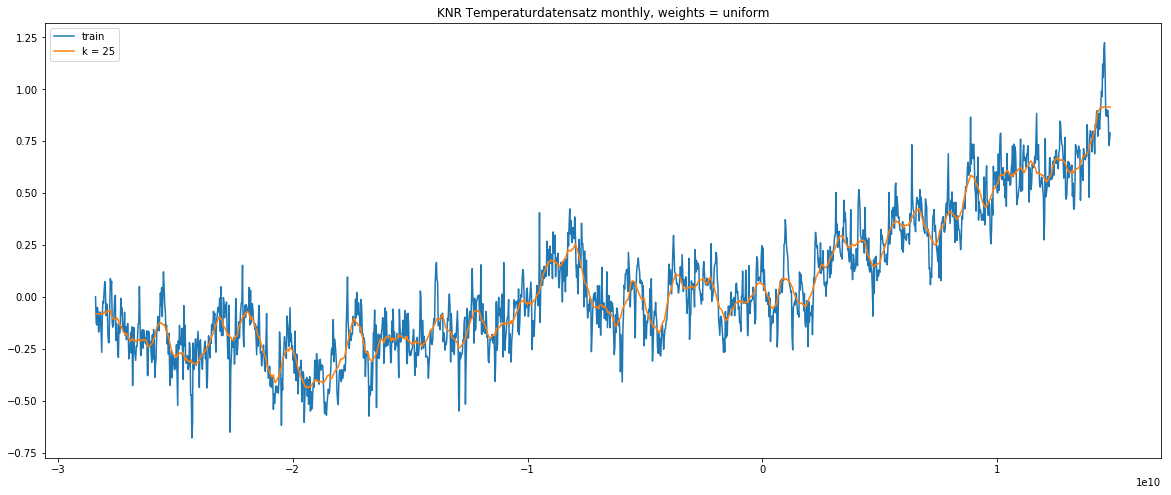

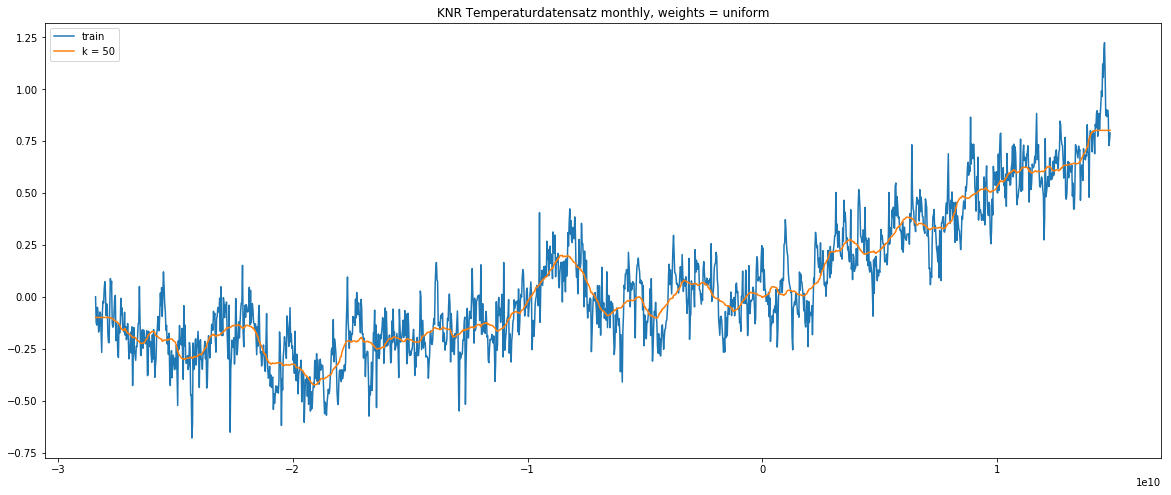

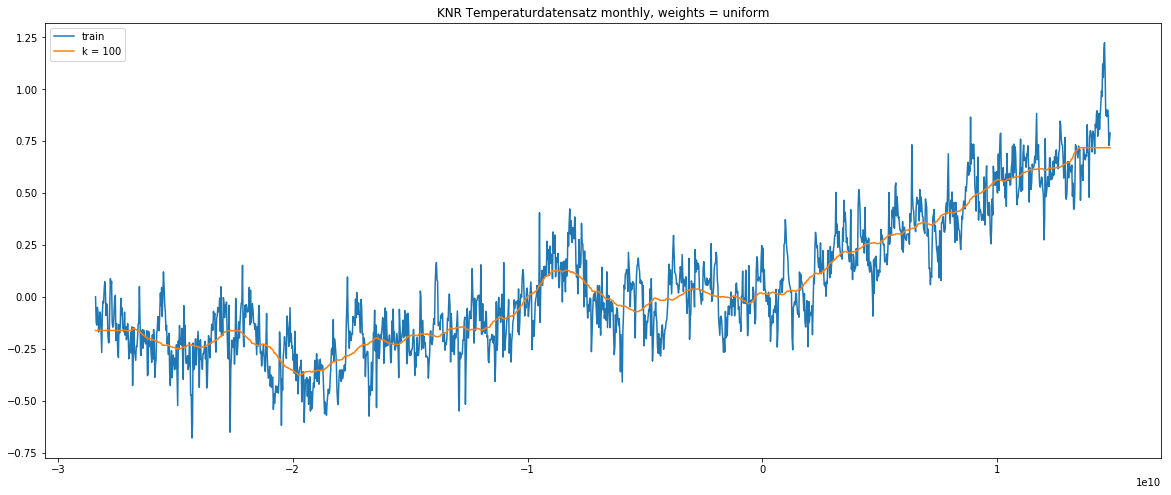

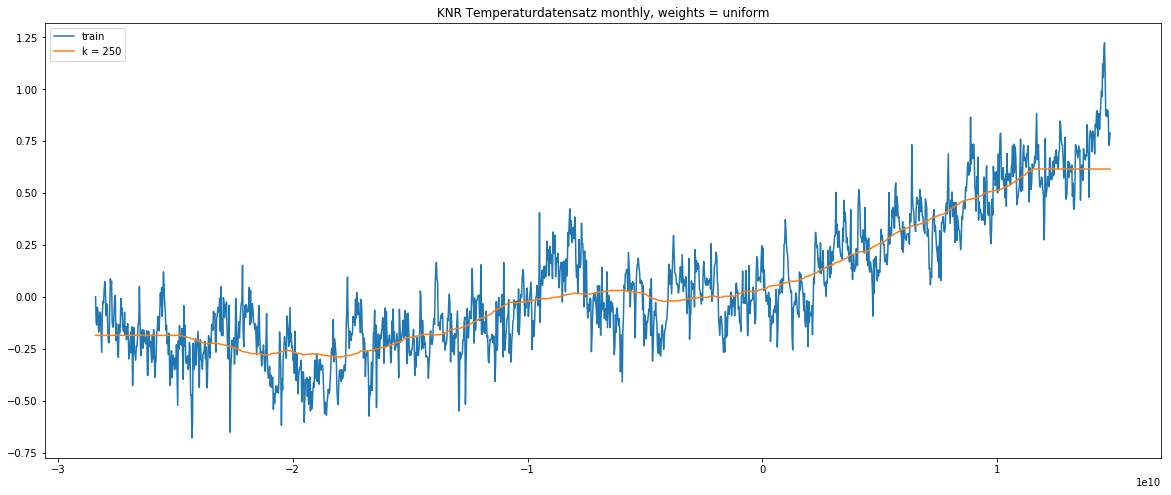

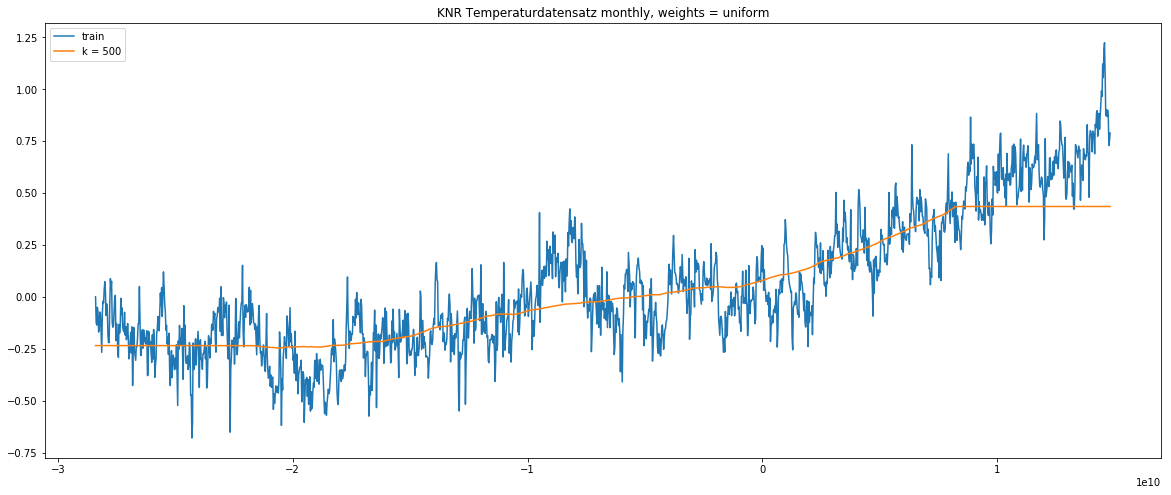

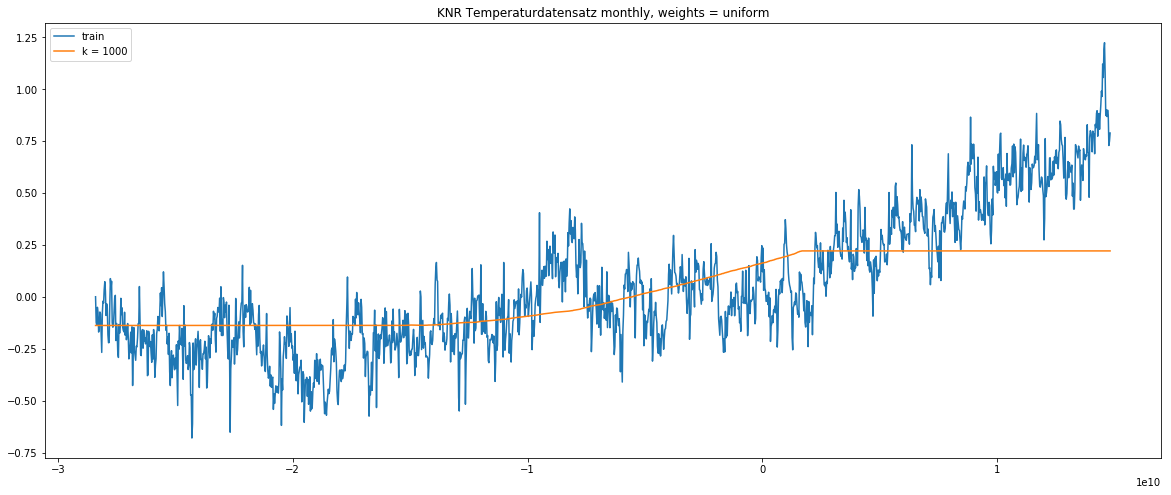

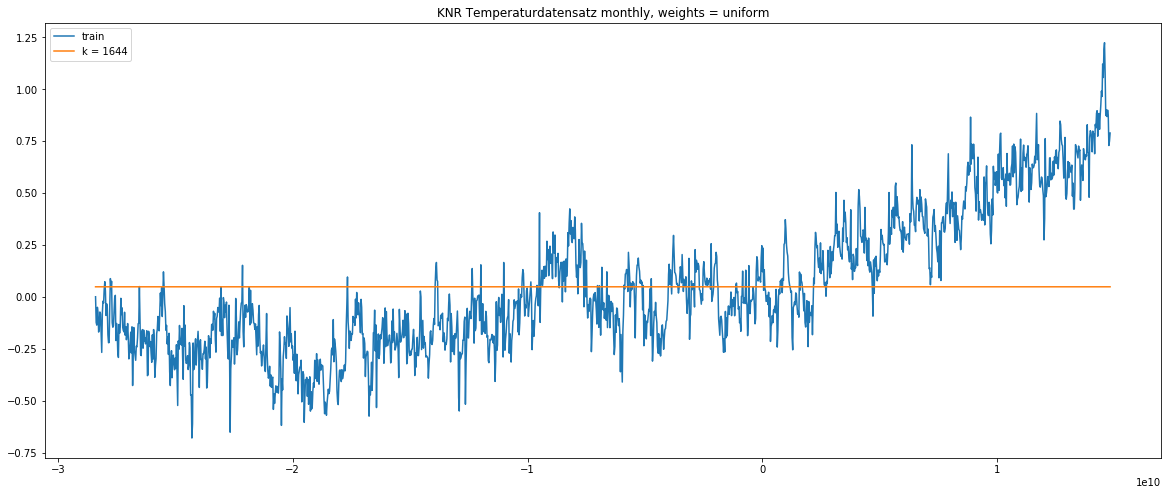

In [10]:
# for loop, um verschieden k darzustellen
output_data = pd.DataFrame(pivot_df["GCAG"].copy(deep = True))
k_range  = [1,10,25,50,100, 250, 500, 1000, 1644]

for k in k_range:
    knr = KNeighborsRegressor (n_neighbors= k, weights = "uniform", algorithm = "brute").fit(x,y)
 
    #Anfügen der berechneten Daten für Trainigsdaten und Testdaten
    output_data["k " + str(k)] = knr.predict(x)  
    plt.figure(figsize =(20,8))
    plt.plot(x, pivot_df["GCAG"], label = "train")
    plt.plot(x, output_data["k " + str(k)], label = "k = " + str(k))
    plt.legend(loc="upper left")
    plt.title("KNR Temperaturdatensatz monthly, weights = uniform")
    plt.show()



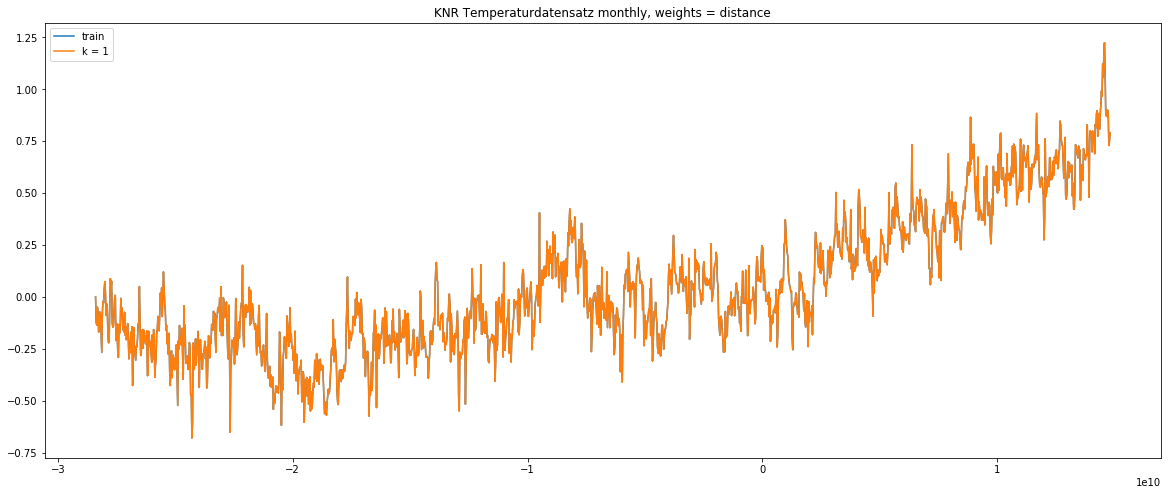

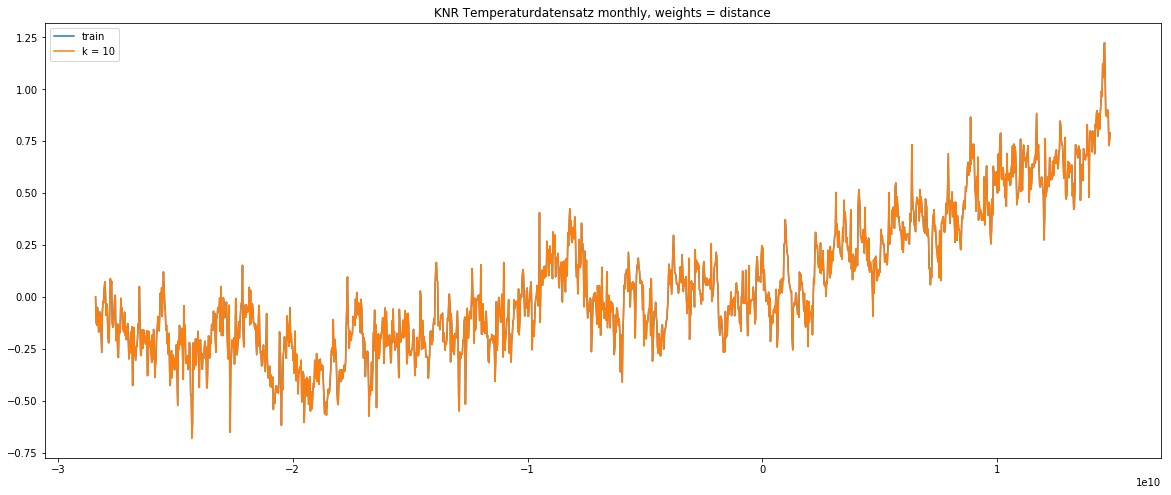

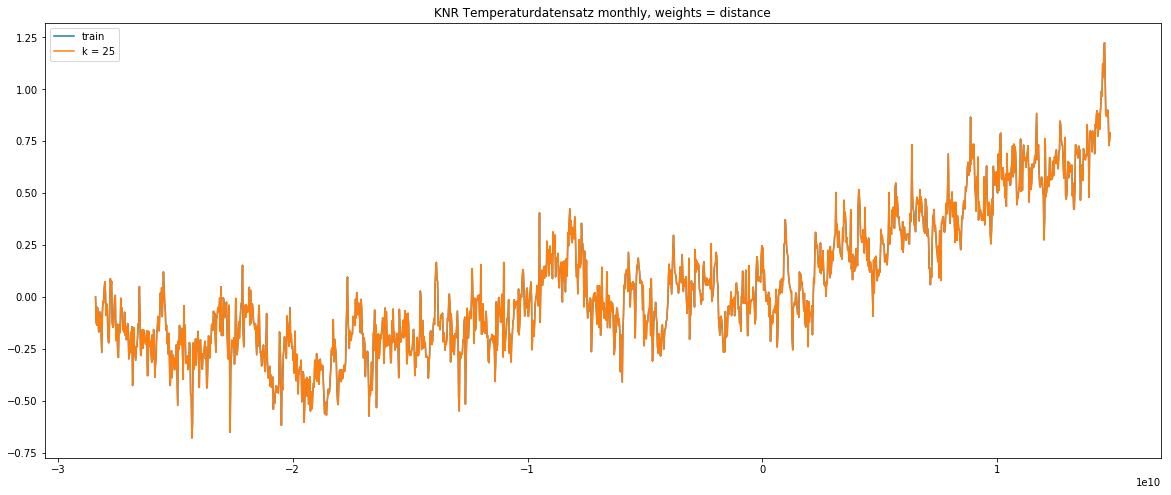

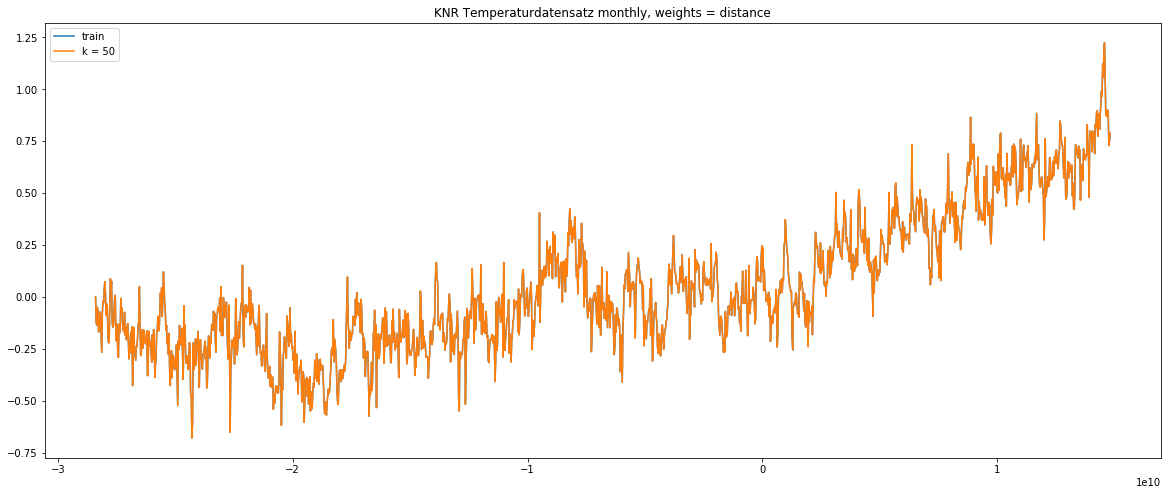

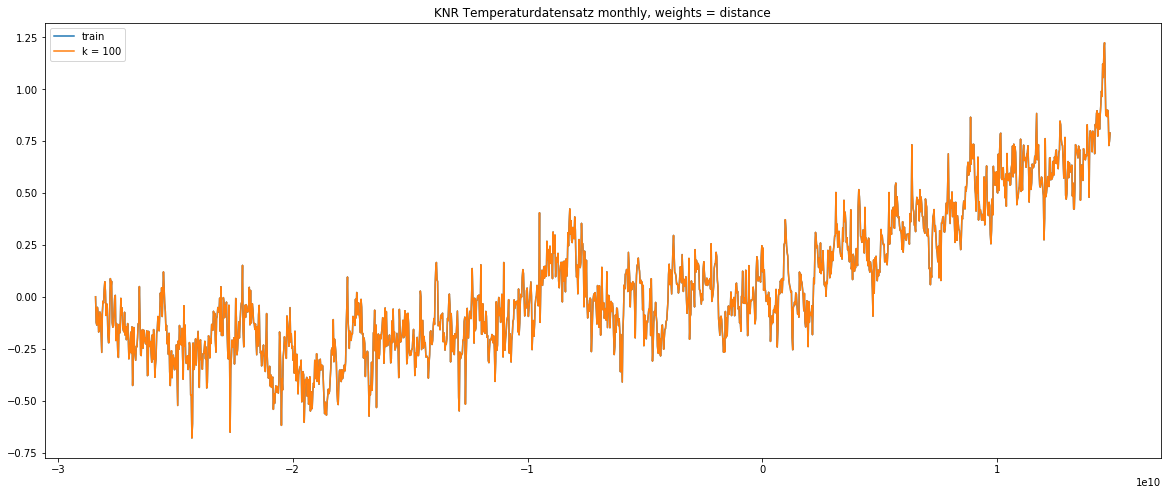

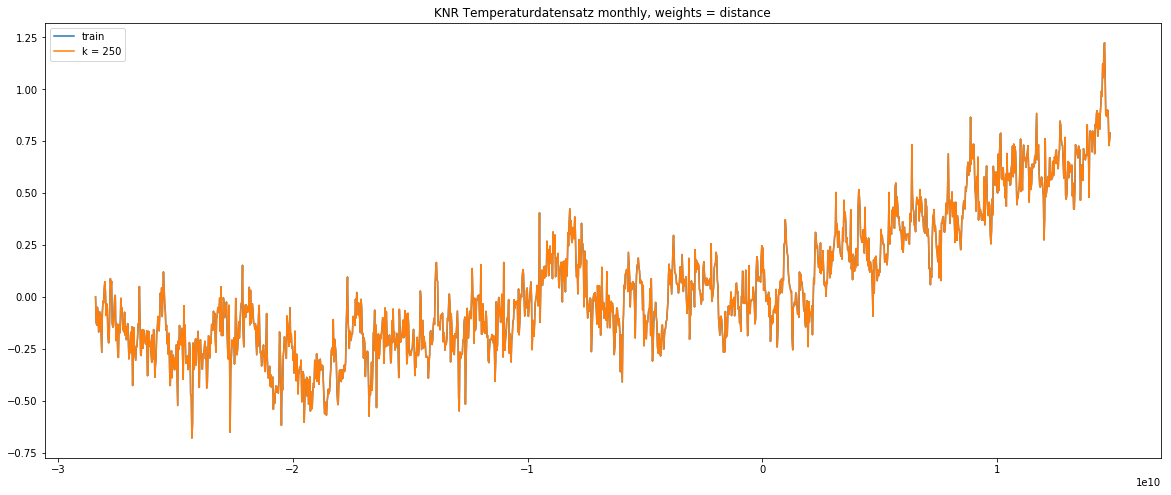

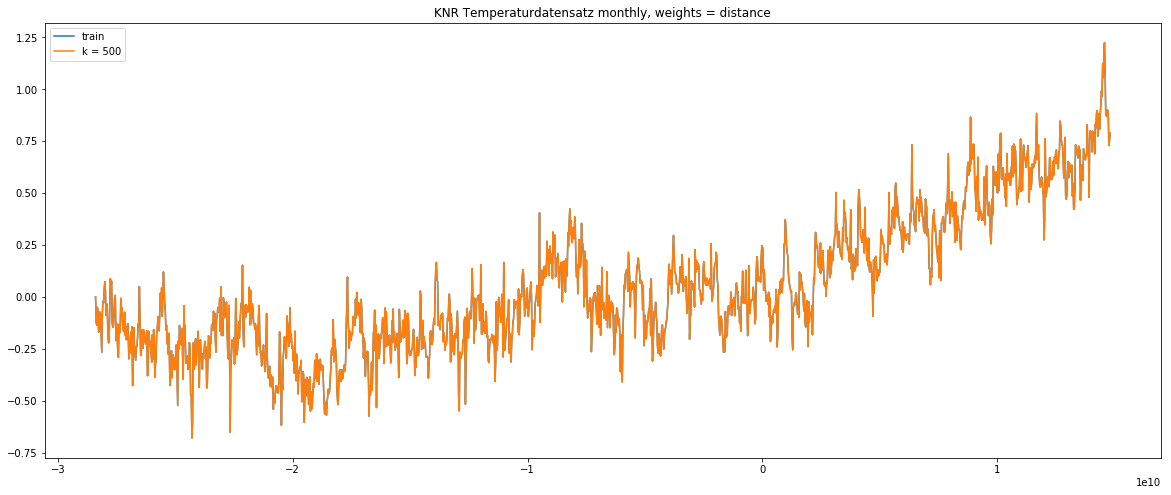

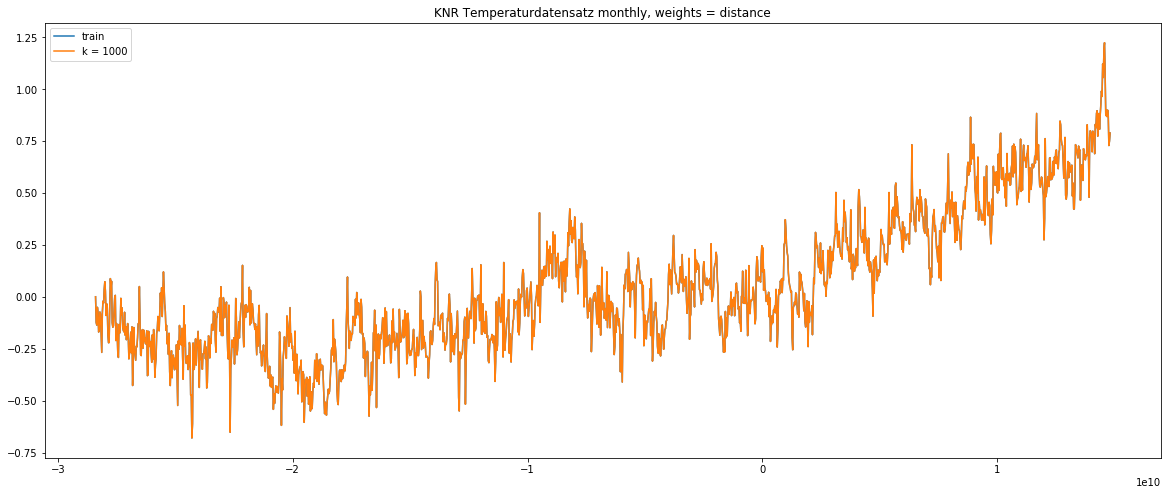

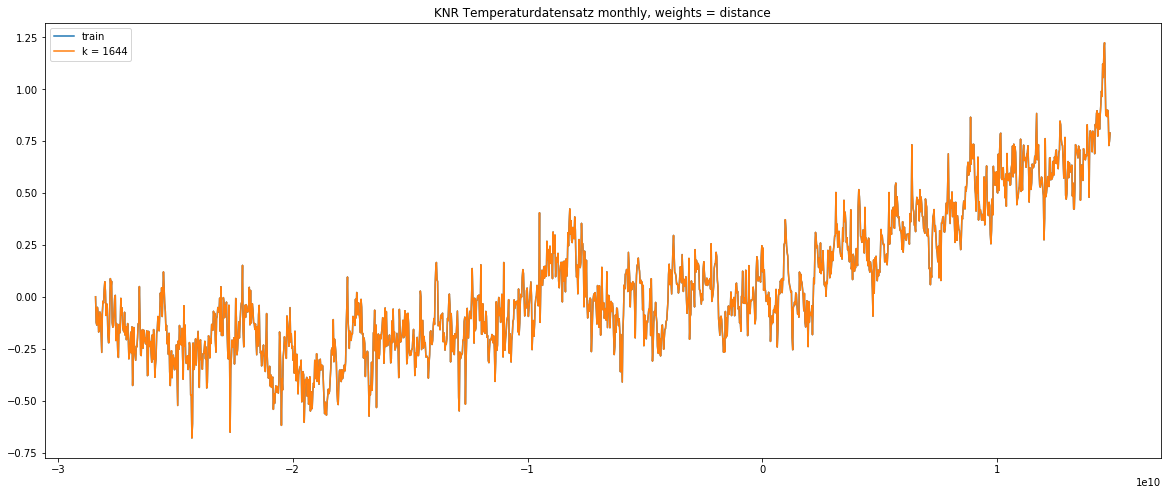

In [11]:
# Hyperparameter weights = "distance"
output_data = pd.DataFrame(pivot_df["GCAG"].copy(deep = True))
k_range  = [1,10,25,50,100, 250, 500, 1000, 1644]

for k in k_range:
    knr = KNeighborsRegressor (n_neighbors= k, weights = "distance", algorithm = "brute").fit(x,y)
 
    #Anfügen der berechneten Daten für Trainigsdaten und Testdaten
    output_data["k " + str(k)] = knr.predict(x)  
    plt.figure(figsize =(20,8))
    plt.plot(x, pivot_df["GCAG"], label = "train")
    plt.plot(x, output_data["k " + str(k)], label = "k = " + str(k))
    plt.legend(loc="upper left")
    plt.title("KNR Temperaturdatensatz monthly, weights = distance")
    plt.show()

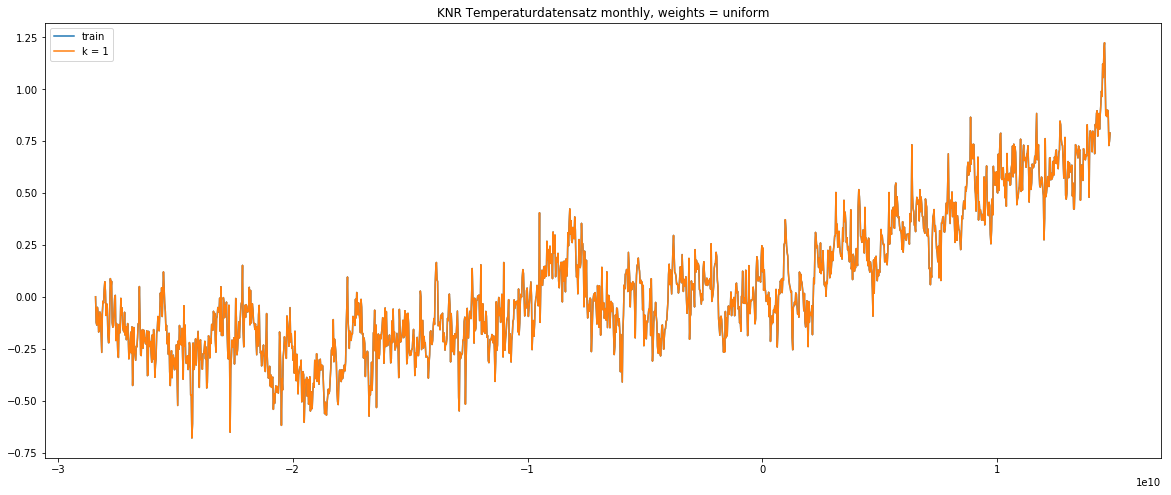

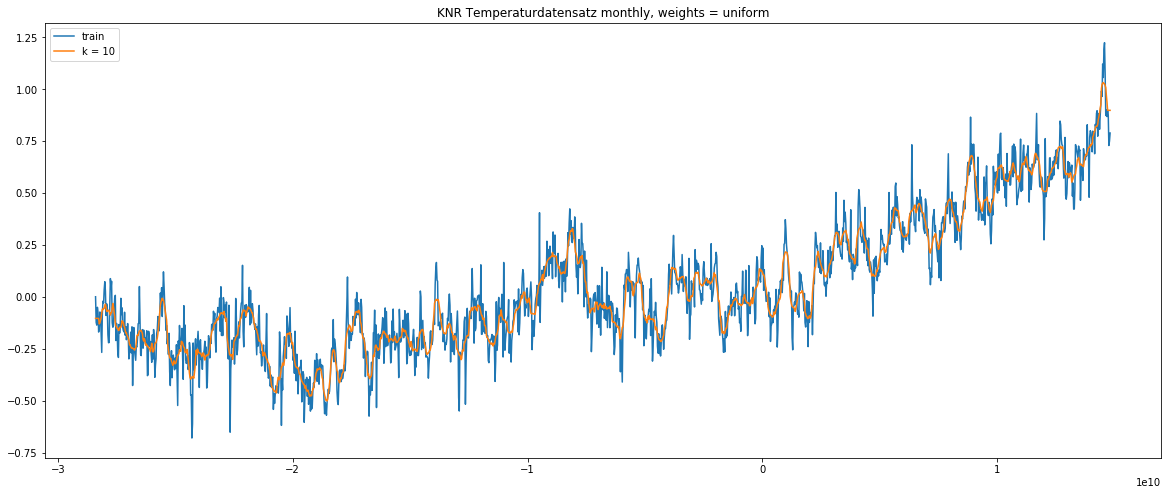

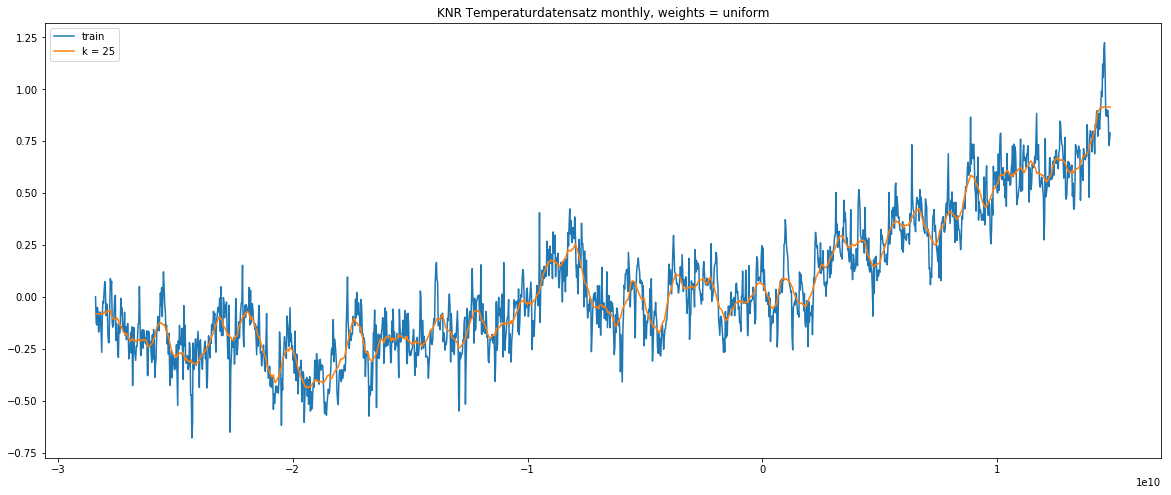

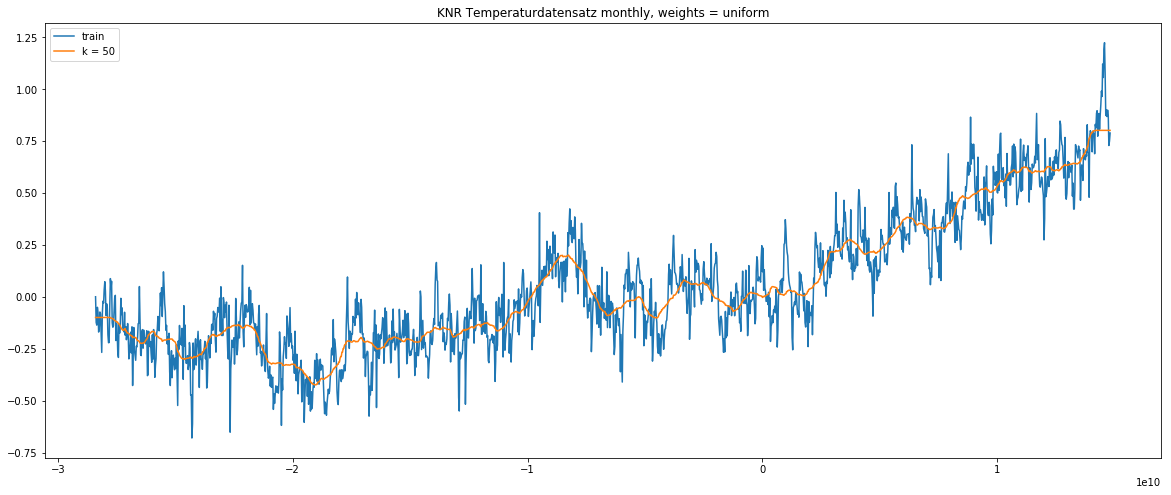

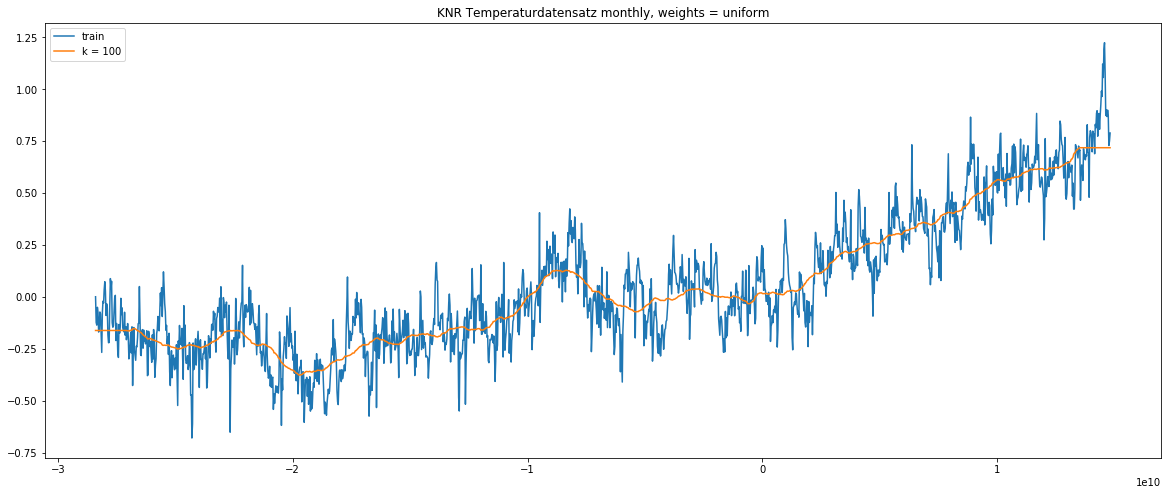

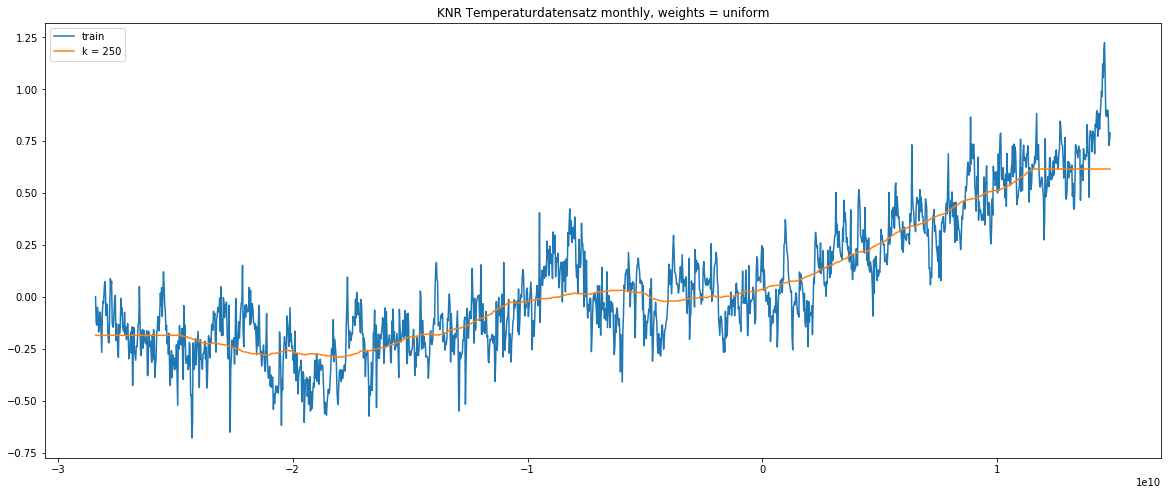

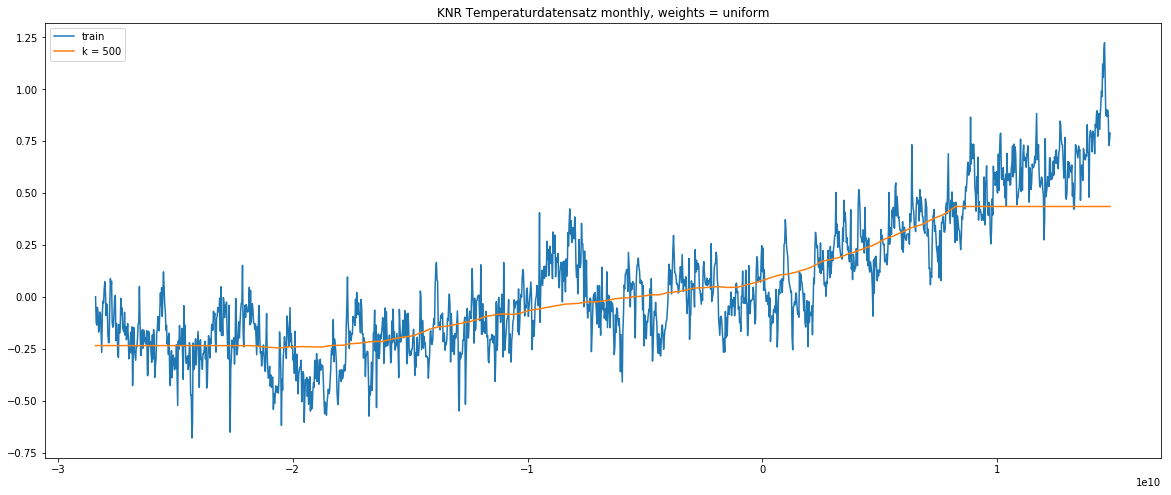

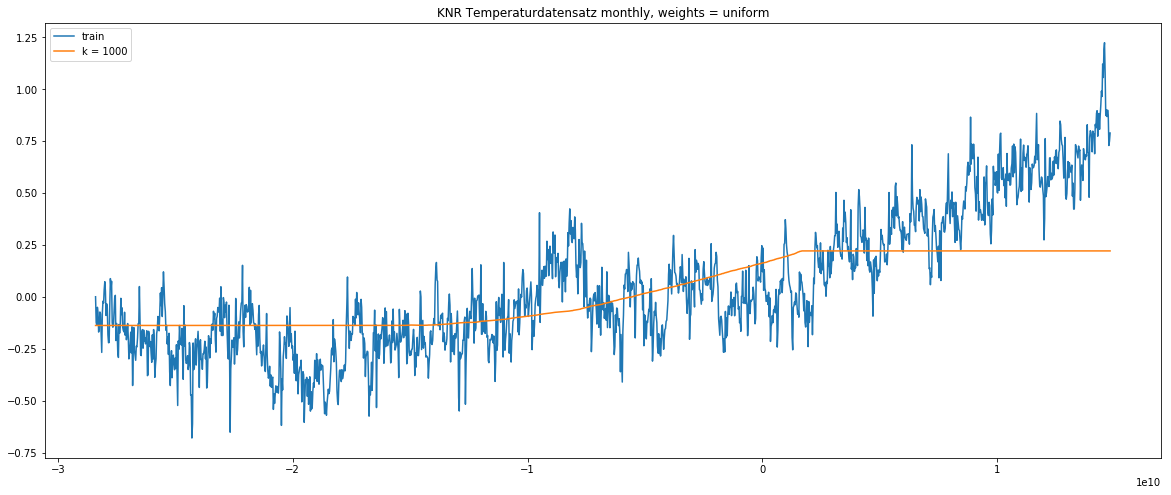

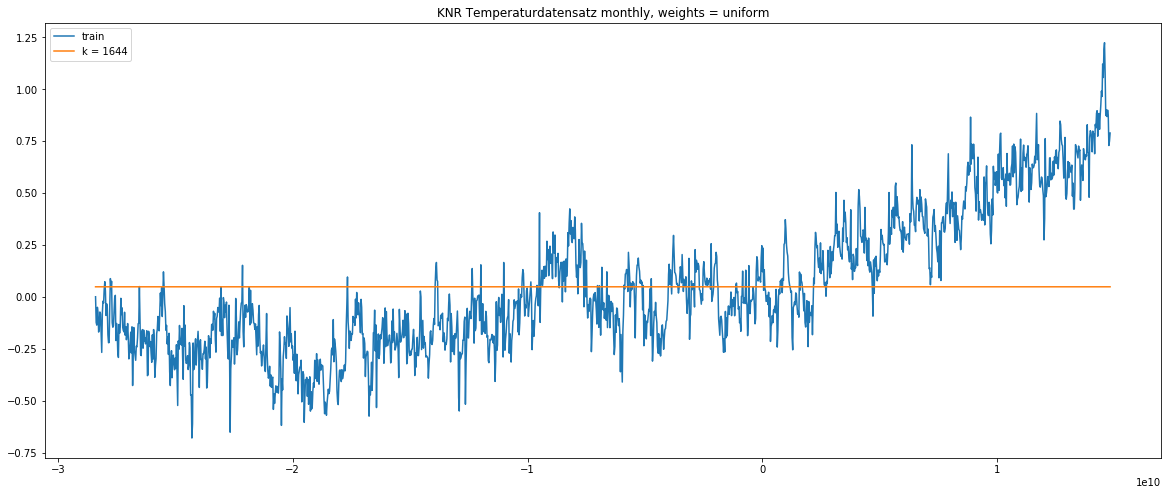

In [12]:
# Hyperparameter, algorithm = "auto"
output_data = pd.DataFrame(pivot_df["GCAG"].copy(deep = True))
k_range  = [1,10,25,50,100, 250, 500, 1000, 1644]

for k in k_range:
    knr = KNeighborsRegressor (n_neighbors= k, weights = "uniform", algorithm = "auto").fit(x,y)
 
    #Anfügen der berechneten Daten für Trainigsdaten und Testdaten
    output_data["k " + str(k)] = knr.predict(x)  
    plt.figure(figsize =(20,8))
    plt.plot(x, pivot_df["GCAG"], label = "train")
    plt.plot(x, output_data["k " + str(k)], label = "k = " + str(k))
    plt.legend(loc="upper left")
    plt.title("KNR Temperaturdatensatz monthly, weights = uniform")
    plt.show()

# Lineare Regression

In [13]:
linreg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1).fit(x,y)

In [14]:
data_df = pd.DataFrame(GCAG_data)
data_df["LinReg"] = linreg.predict(x) # was er predicted, soll an data_df in Spalte "LingReg" eingefügt werden
y_linreg = linreg.predict(x)
data_df.count()

GCAG      1644
LinReg    1644
dtype: int64

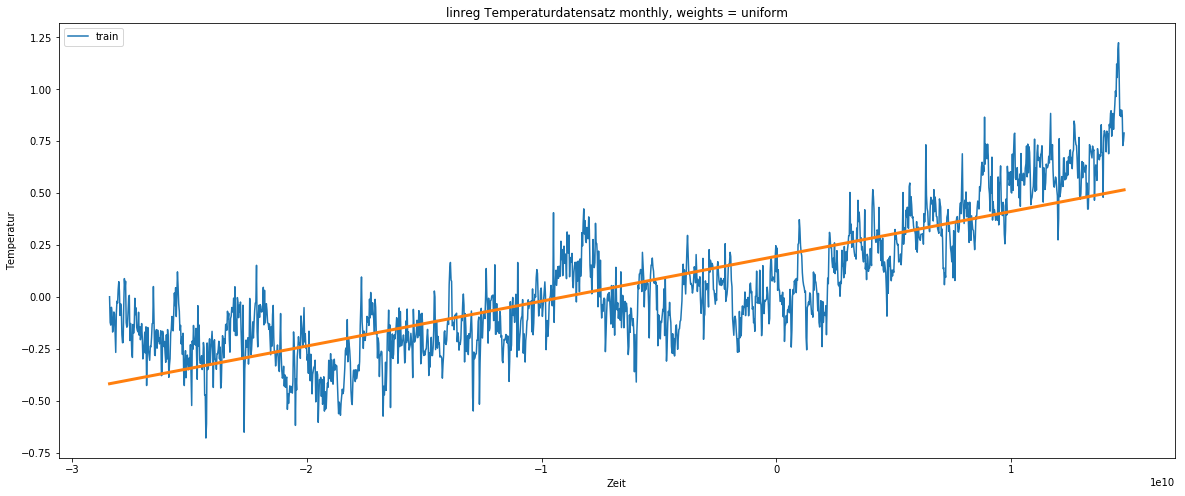

In [15]:
output_data_linreg = pd.DataFrame(pivot_df["GCAG"].copy(deep = True))

plt.figure(figsize =(20,8))
plt.plot(x, pivot_df["GCAG"], label = "train")
plt.plot(x, y_linreg, linewidth = 3)
plt.xlabel ("Zeit")
plt.ylabel("Temperatur")
plt.legend(loc="upper left")
plt.title("linreg Temperaturdatensatz monthly, weights = uniform")
plt.show()



In [16]:
rss = (y_linreg - pivot_df["GCAG"])**2
rss.mean()

0.03360336336742068

In [17]:
#Bestimmung des RSS (residual sum of squares)
rss_linreg = mean_squared_error(pivot_df["GCAG"], y_linreg, sample_weight=None, multioutput="uniform_average")
rss_linreg

0.03360336336742066

In [18]:
# Bestimmung des R**2/Bestimmtheitsmaß/Korrelationskoeffizient
r2_score(pivot_df["GCAG"], y_linreg)

0.684063463173839

In [19]:
# Berechnung des RSE (residual standard error)
RSE = abs(y_linreg - pivot_df["GCAG"])
# abs() Betrag
RSE.head()

Date
1880-01-06    0.419001
1880-02-06    0.294622
1880-03-06    0.281281
1880-04-06    0.366502
1880-05-06    0.342041
Name: GCAG, dtype: float64

# Aufgabe: 
- Implementiere Lineare Regression
- Teile die Daten in ein Train- und Test-set
- Berechne Trainings- und Test- Fehler für KNR und Lineare Regression:
    - RSE (residual standard error)
    - RSS (residual sum of squares)
    - R^2 Statistik (Bestimmtheitsmaß, Korrelationskoeffizeint)

In [20]:
# Daten in Test- und Trainingsdaten aufteilen. Mit 80 % der Daten wird trainiert, mit 20 % der Daten wird getestet

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
x_train_sort = np.sort(x_train, axis = 0)
type(x_train_sort)

numpy.ndarray

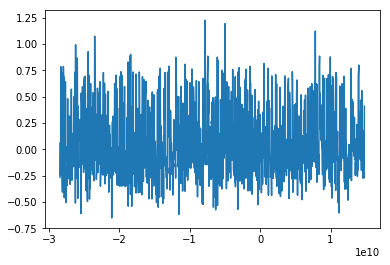

In [22]:
plt.plot(x_train_sort, y_train)
plt.show()

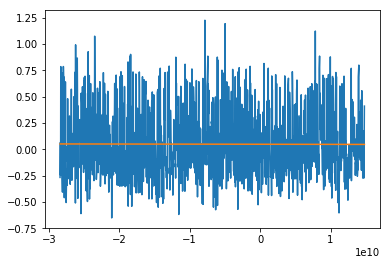

In [23]:
linreg_train = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1).fit(x_train_sort,y_train)
predict_train = linreg_train.predict(x_train_sort)


plt.plot(x_train_sort,y_train)
plt.plot(x_train_sort,predict_train)
plt.show()

In [24]:
# Berechnung von:
    # - residual standard error (RSE)
    # - residual sum of squares (RSS)
    # - R**2 (Bestimmtheitsmaß, Korrelationskoeffizient)
# RSE    
RSE_train = abs(predict_train - x_train_sort)
RSE_train

array([[2.8397088e+10, 2.8397088e+10, 2.8397088e+10, ..., 2.8397088e+10,
        2.8397088e+10, 2.8397088e+10],
       [2.8370304e+10, 2.8370304e+10, 2.8370304e+10, ..., 2.8370304e+10,
        2.8370304e+10, 2.8370304e+10],
       [2.8345248e+10, 2.8345248e+10, 2.8345248e+10, ..., 2.8345248e+10,
        2.8345248e+10, 2.8345248e+10],
       ...,
       [1.4731200e+10, 1.4731200e+10, 1.4731200e+10, ..., 1.4731200e+10,
        1.4731200e+10, 1.4731200e+10],
       [1.4783904e+10, 1.4783904e+10, 1.4783904e+10, ..., 1.4783904e+10,
        1.4783904e+10, 1.4783904e+10],
       [1.4809824e+10, 1.4809824e+10, 1.4809824e+10, ..., 1.4809824e+10,
        1.4809824e+10, 1.4809824e+10]])

In [25]:
# RSS
RSS_train = mean_squared_error(y_train, predict_train, sample_weight=None, multioutput="uniform_average")
RSS_train

0.1066265882563111

In [26]:
# Bestimmtheitsmaß/Korrelationskoeffizient
r2_train = r2_score(y_train, predict_train)
r2_train

1.5558319321762326e-05

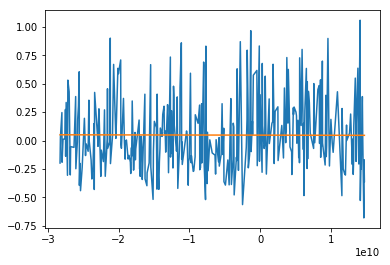

In [27]:
x_test_sort = np.sort(x_test, axis = 0)
predict_test = linreg_train.predict(x_test_sort)

plt.plot(x_test_sort,y_test)
plt.plot(x_test_sort,predict_test)
plt.show()

In [28]:
RSE_test = abs(predict_test - y_test)


In [29]:
RSS_test = mean_squared_error(y_test, predict_test, sample_weight=None, multioutput="uniform_average")
RSS_test

0.10538533880739706

In [30]:
r2_test = r2_score(y_test, predict_test)
r2_test

-0.0009184041497323214

# Fitten von KNR mit Trainings- und Testdaten sowie Berechnung verschiedener Fehler (RSS,RSE) und R2
## Trainigsdaten

In [31]:
# Fitten der Trainigsdaten
knr_train = KNeighborsRegressor (n_neighbors= 100, weights = "uniform", algorithm = "brute").fit(x_train_sort,y_train)

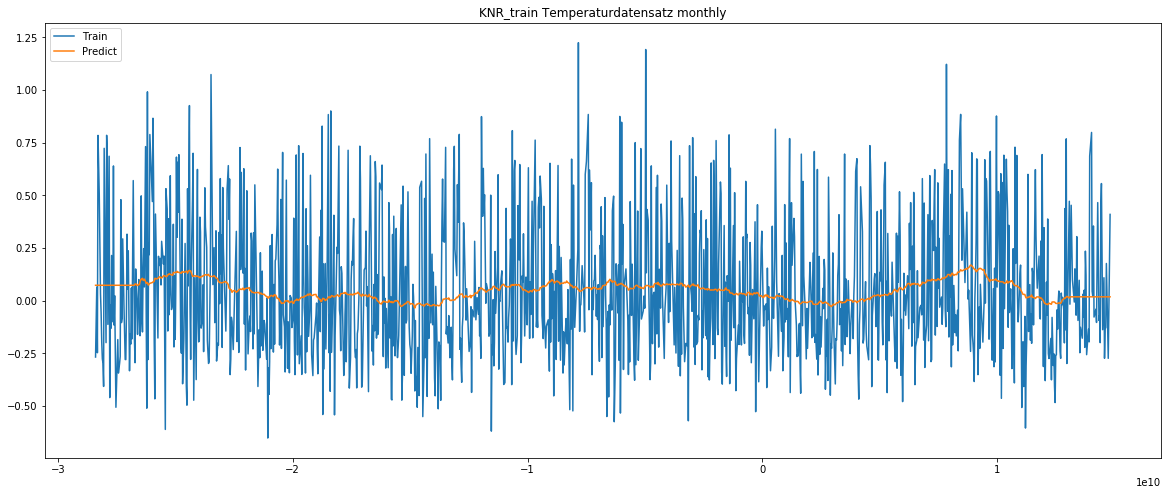

In [32]:
# Predicten der Temperatur basierend auf den Zeitwerten mit den Trainigsdaten
pd_train = pd.DataFrame(x_train_sort)
pd_train["KNR_train"] = knr_train.predict(x_train_sort)
pd_train

plt.figure(figsize =(20,8))
plt.plot(x_train_sort, y_train, label = "Train")
plt.plot(x_train_sort, pd_train["KNR_train"], label = "Predict")
plt.legend(loc="upper left")
plt.title("KNR_train Temperaturdatensatz monthly")
plt.show()

In [33]:
# Berechnung der Fehler für den Trainingsdatensatz
RSE_train_knr = abs(pd_train["KNR_train"] - y_train)
RSE_train_knr
RSS_train_knr = mean_squared_error(y_train, pd_train["KNR_train"], sample_weight=None, multioutput="uniform_average")
RSS_train_knr
r2_train_knr = r2_score(y_train, pd_train["KNR_train"])
r2_train_knr

0.01782672027866028

In [34]:
# Darstellung der Fehler für den Trainingsdatensatz in einem DataFrame
errors_knr_train = pd.DataFrame()

In [42]:
errors_knr_train["RSS_train_knr"] = RSS_train_knr
errors_knr_train["r2_train_knr"] = r2_train_knr
errors_knr_train

Empty DataFrame
Columns: [RSS_train_knr, r2_train_knr]
Index: []

## Testdaten

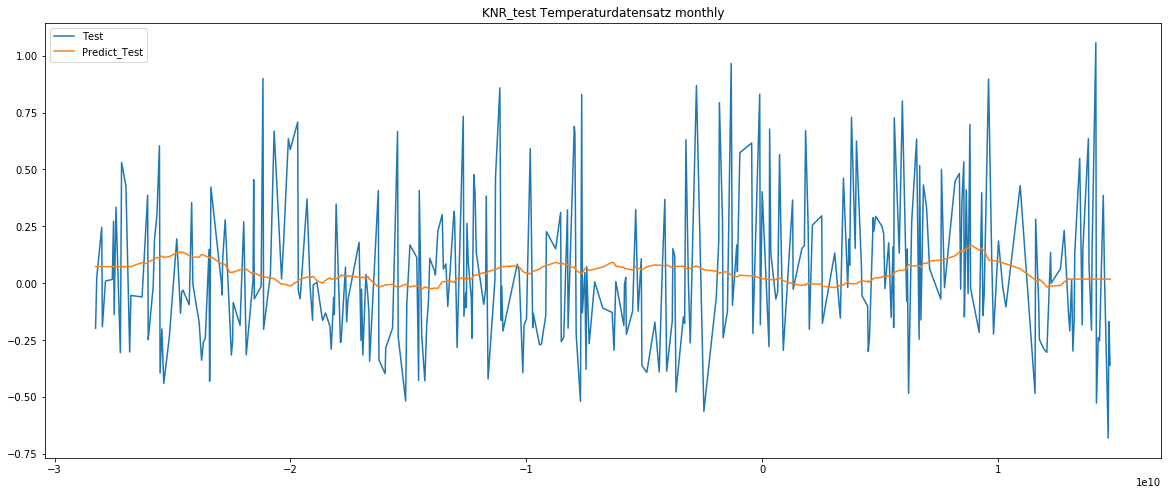

In [36]:
# Predicten der Temperatur basierend auf den Zeitwerten der Testdaten; gefittet mit Trainigsdaten
pd_test = pd.DataFrame(x_test_sort)
pd_test["KNR_test"] = knr_train.predict(x_test_sort)
pd_test

plt.figure(figsize =(20,8))
plt.plot(x_test_sort, y_test, label = "Test")
plt.plot(x_test_sort, pd_test["KNR_test"], label = "Predict_Test")
plt.legend(loc="upper left")
plt.title("KNR_test Temperaturdatensatz monthly")
plt.show()

In [46]:
# Berechnung der Fehler für den Trainingsdatensatz
RSE_test_knr = abs(pd_test["KNR_test"] - y_test)
RSE_test_knr
RSS_test_knr = mean_squared_error(y_test, pd_test["KNR_test"], sample_weight=None, multioutput="uniform_average")
RSS_test_knr
r2_test_knr = r2_score(y_test, pd_test["KNR_test"])
r2_test_knr

-0.01973696561133864

In [38]:
# Darstellung der Fehler für den Testdatensatz in einem DataFrame
errors_knr_test = pd.DataFrame()

In [41]:
errors_knr_test["RSS_test_knr"] = RSS_test_knr
errors_knr_test["r2_test_knr"] = r2_test_knr
errors_knr_test

Empty DataFrame
Columns: [RSS_test_knr, r2_test_knr]
Index: []

In [40]:
RSS_test_knr

0.10736671957457751

# verschiedene k für KNR in einem for loop und Fehler berechnen für Trainigsdatensatz und für Testdatensatz
## Trainigsdatensatz

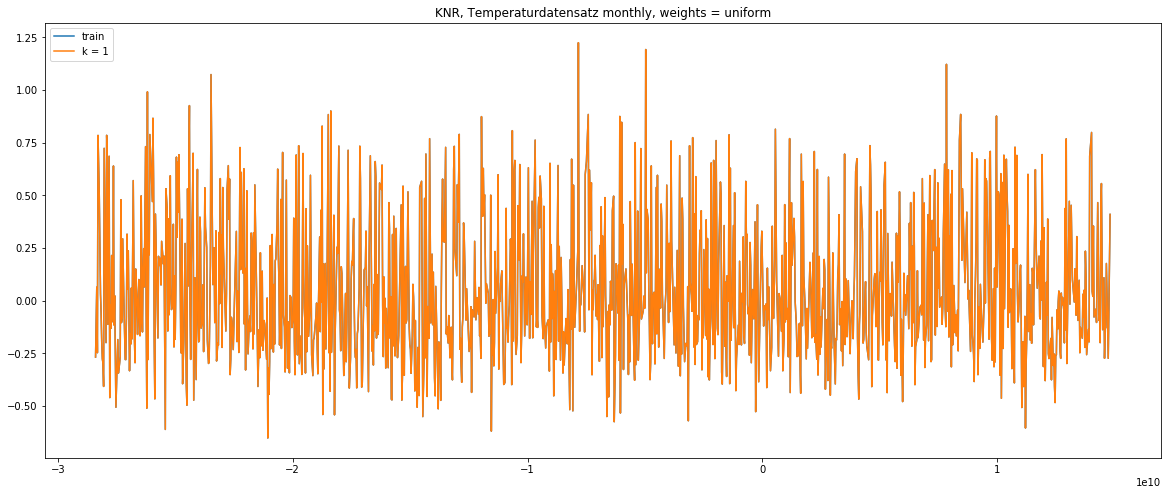

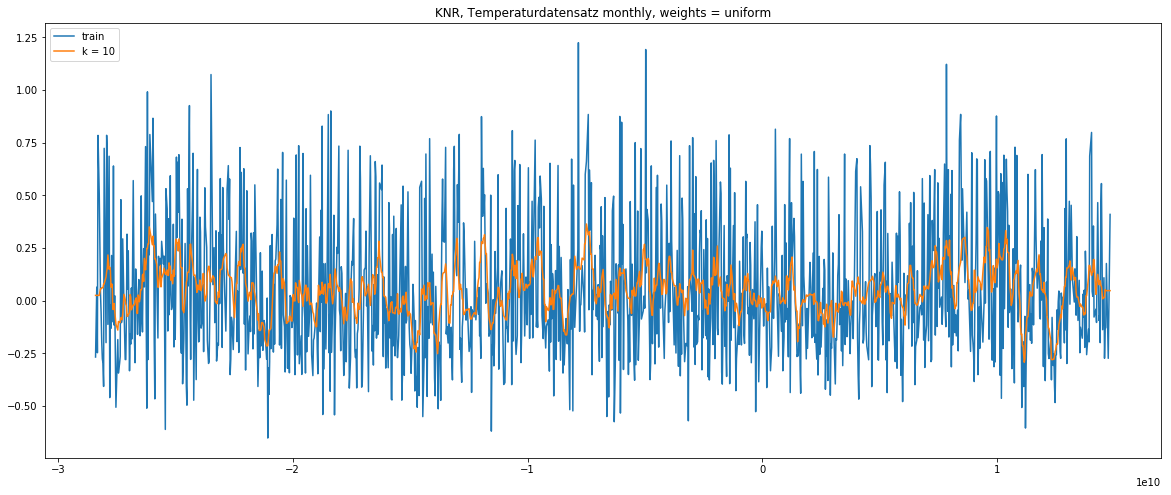

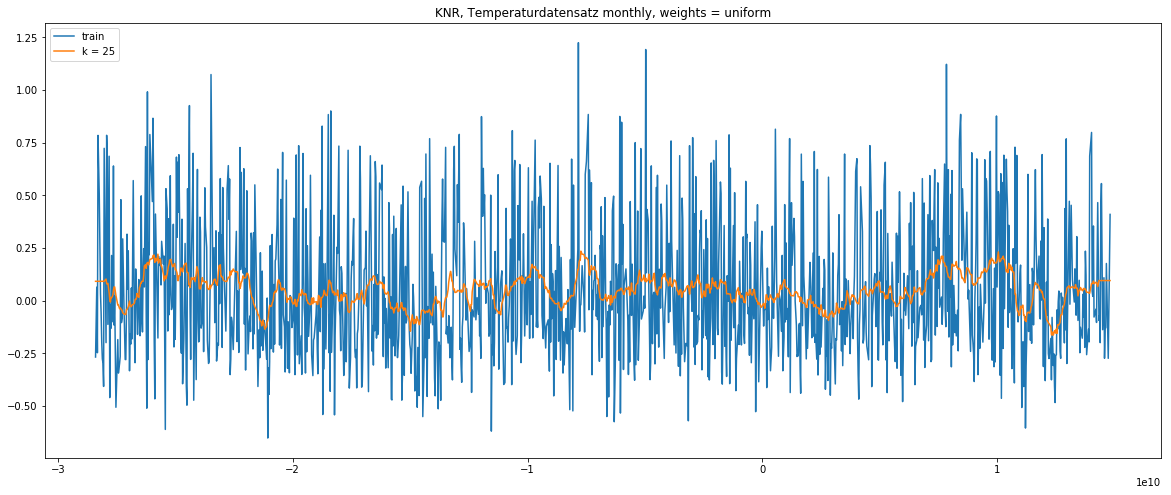

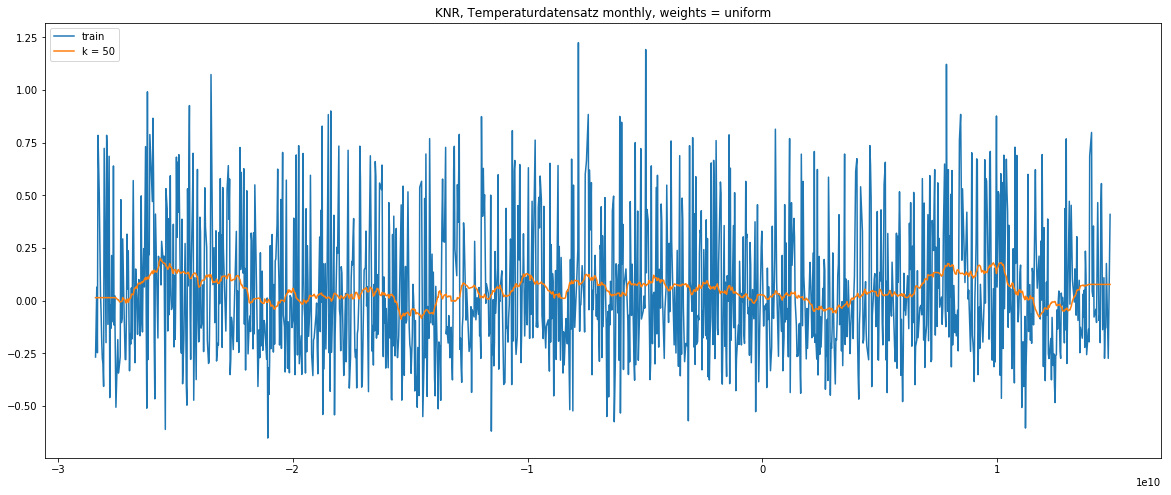

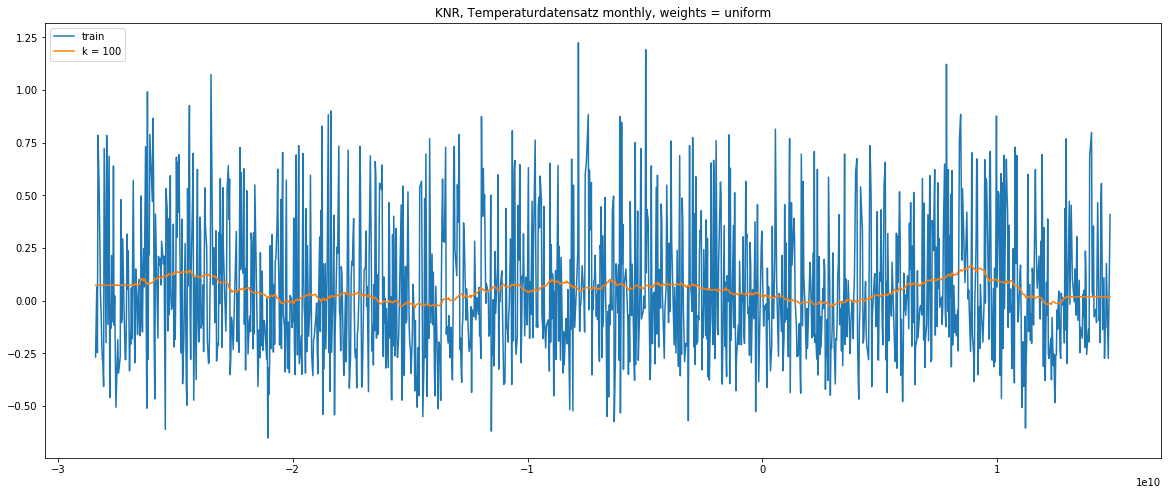

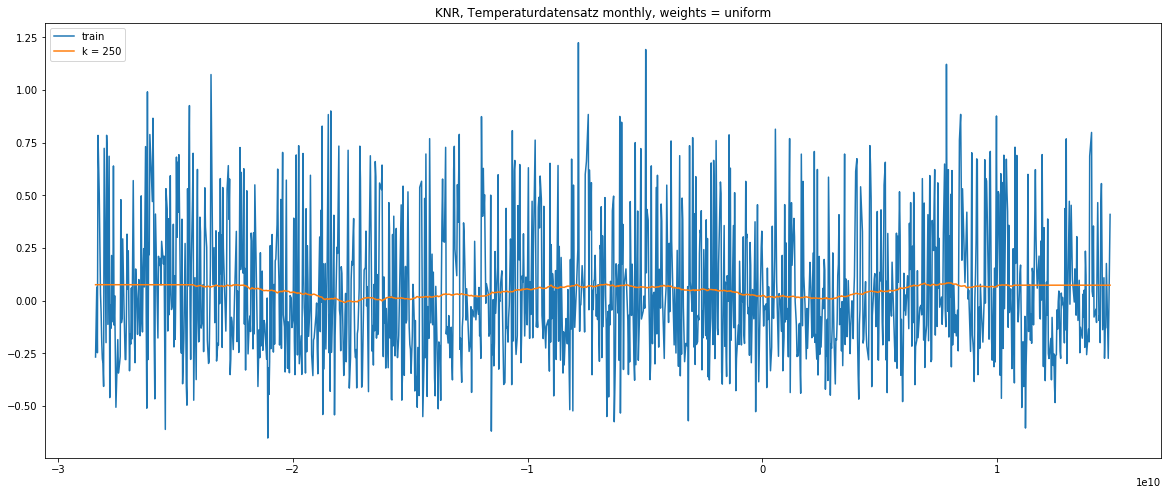

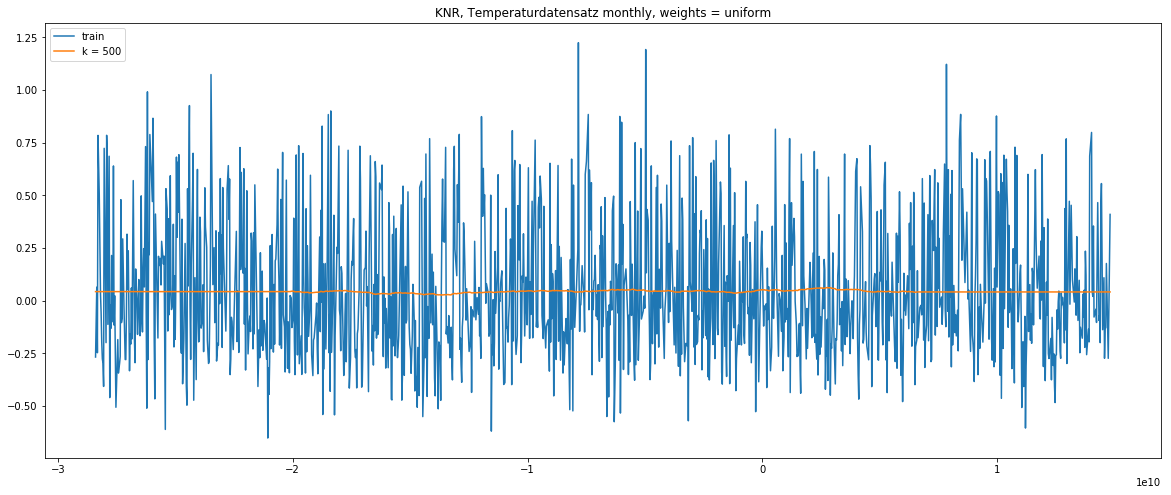

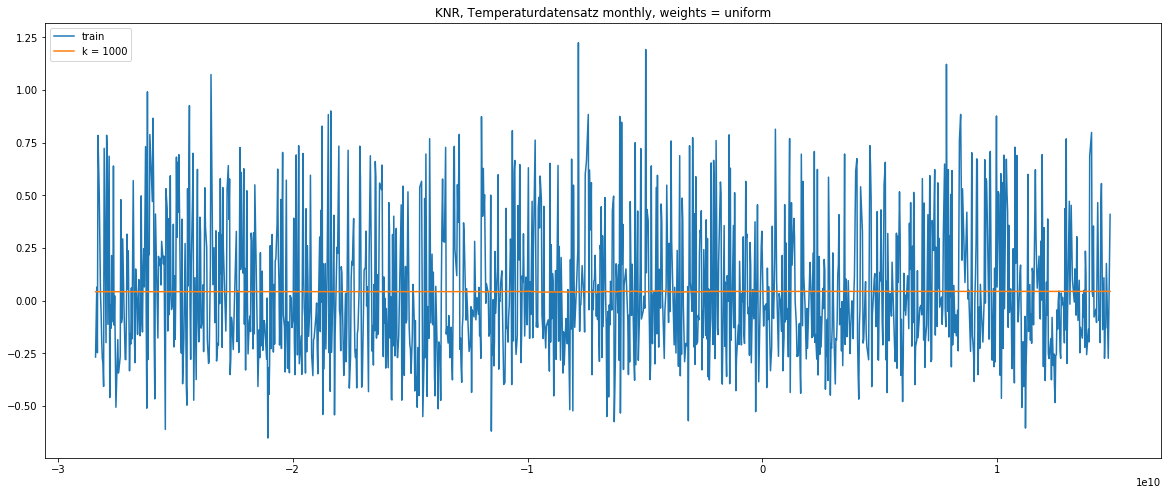

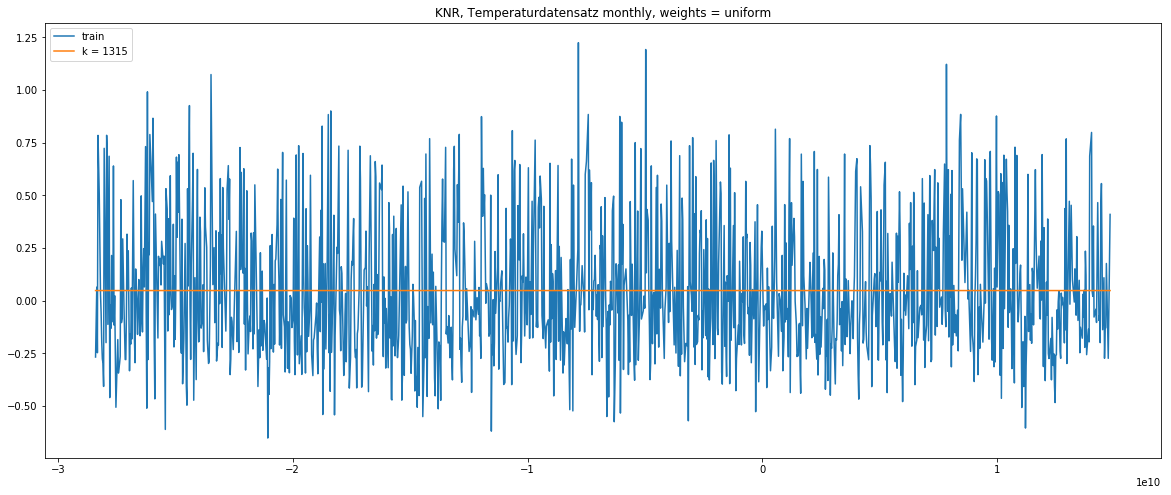

In [44]:
# for loop, um verschiedene k darzustellen
output_data_train = pd.DataFrame(x_train_sort)
k_range_train  = [1,10,25,50,100, 250, 500, 1000, 1315]

for k in k_range_train:
    # Fitten von KNR basierend auf Trainingsdaten
    knr_train = KNeighborsRegressor (n_neighbors= k, weights = "uniform", algorithm = "brute").fit(x_train_sort,y_train)
 
    # predicten von train
    output_data_train["k " + str(k)] = knr_train.predict(x_train_sort)
    
    # Darstellung der Daten
    plt.figure(figsize =(20,8))
    plt.plot(x_train_sort, y_train, label = "train")
    plt.plot(x_train_sort, output_data_train["k " + str(k)], label = "k = " + str(k))
    plt.legend(loc="upper left")
    plt.title("KNR, Temperaturdatensatz monthly, weights = uniform")
    plt.show()

In [47]:
# for loop, um die verschiedenen Fehler und R2 für die verschiedenen k zu berechnen

# leere Listen erstellen, in welche die Daten der Fehlerberechnung im for loop angehängt werden können
rse_train_knr = []
rss_train_knr = []
r2_train_knr = []
k_range_error = [1,10,25,50,100, 250, 500, 1000, 1315]

for k in k_range_error:
    # fitten von KNR
    knr_train = KNeighborsRegressor (n_neighbors= k, weights = "uniform", algorithm = "brute").fit(x_train_sort,y_train)
    
    # prediction von y
    y_predict_train = knr_train.predict(x_train_sort)
    
    # Berechnung der verschiedenen Fehler
    rse = abs(y_train - y_predict_train)
    rss = mean_squared_error(y_train, y_predict_train, sample_weight=None, multioutput="uniform_average")
    
    # Berechnung von R2
    r2 = r2_score(y_train, y_predict_train)
    
    rse_train_knr.append(rse)
    rss_train_knr.append(rss)
    r2_train_knr.append(r2)
   

In [50]:
# Darstellung der rss und r2 in einem DataFrame
rss_r2_train_knr = pd.DataFrame()
rss_r2_train_knr["k"] = k_range_error
rss_r2_train_knr["RSS Train KNR"] = rss_train_knr
rss_r2_train_knr["R2 Train KNR"] = r2_train_knr

rss_r2_train_knr

k  RSS Train KNR  R2 Train KNR
0     1       0.000000      1.000000
1    10       0.093808      0.120235
2    25       0.101984      0.043560
3    50       0.103969      0.024935
4   100       0.104727      0.017827
5   250       0.105680      0.008891
6   500       0.106730     -0.000953
7  1000       0.106659     -0.000293
8  1315       0.106628      0.000000

In [56]:
rss_r2_train_knr.max(0)

k                1315.00000
RSS Train KNR       0.10673
R2 Train KNR        1.00000
dtype: float64

In [51]:
# Ausgabe von rse
rse_train_knr

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.29266, 0.11676, 0.03914, ..., 0.32117, 0.12373, 0.36183]),
 array([0.359444, 0.183544, 0.027644, ..., 0.36906 , 0.07584 , 0.31394 ]),
 array([0.281832, 0.105932, 0.049968, ..., 0.350742, 0.094158, 0.332258]),
 array([0.340609, 0.164709, 0.008809, ..., 0.291848, 0.153052, 0.391152]),
 array([0.3432816, 0.1673816, 0.0114816, ..., 0.3471196, 0.0977804,
        0.3358804]),
 array([0.3104976, 0.1345976, 0.0213024, ..., 0.31502  , 0.12988  ,
        0.36798  ]),
 array([0.3101251, 0.1342251, 0.0216749, ..., 0.3176089, 0.1272911,
        0.3653911]),
 array([0.31550852, 0.13960852, 0.01629148, ..., 0.32160852, 0.12329148,
        0.36139148])]

## Testdatensatz

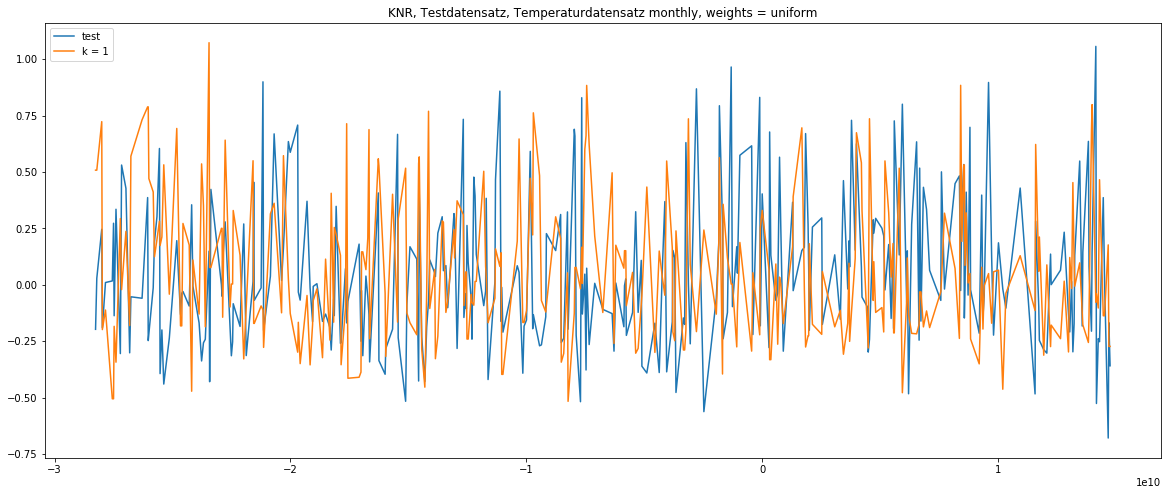

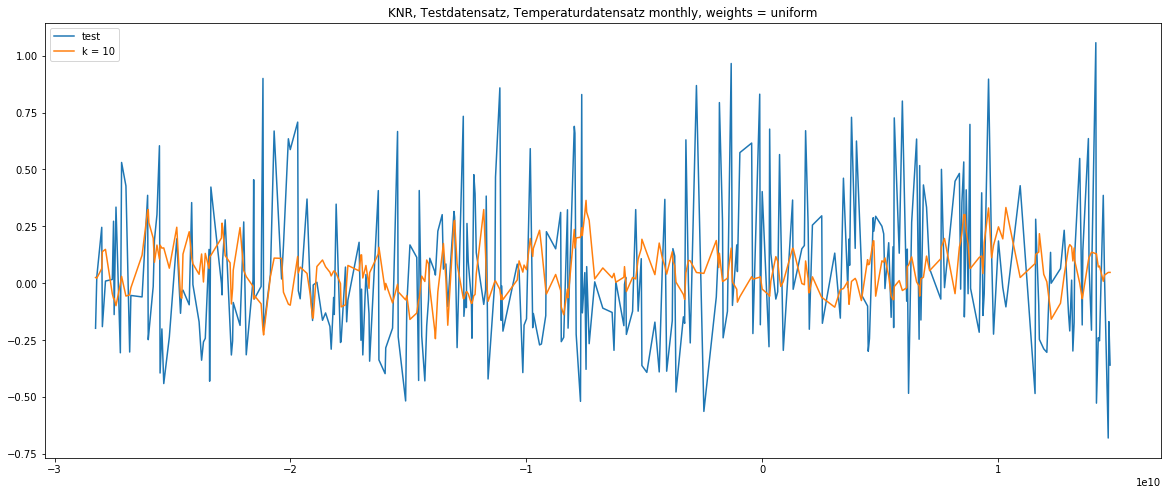

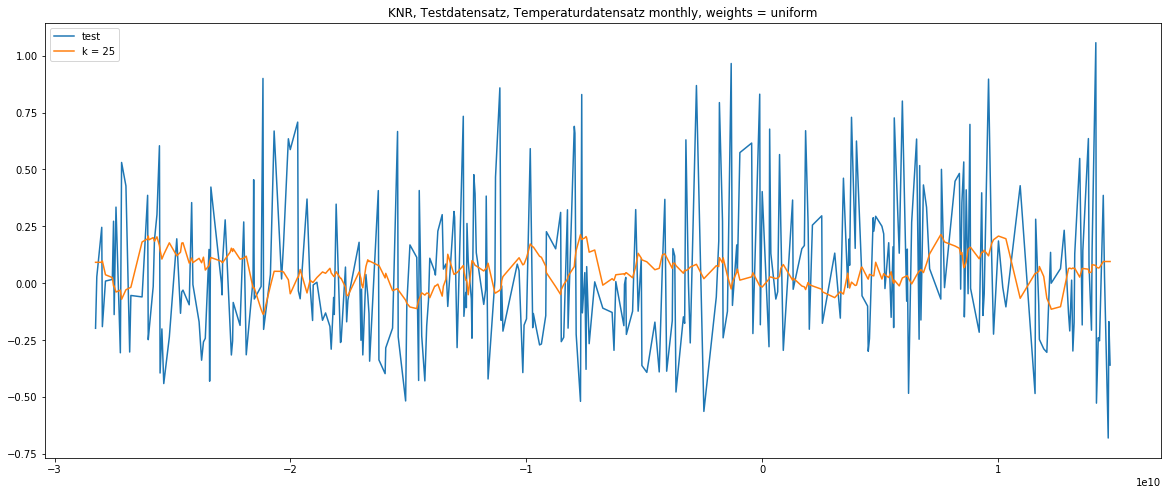

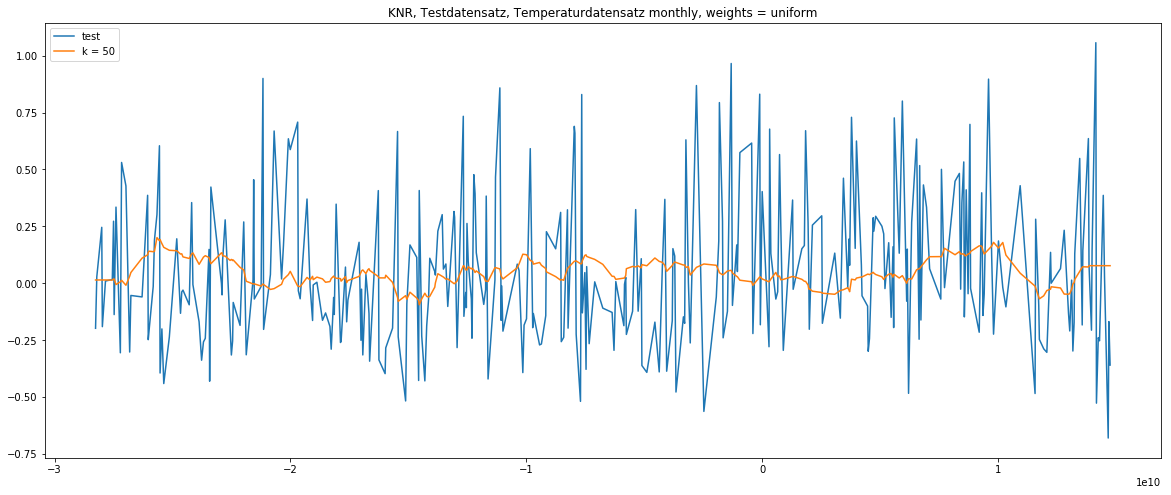

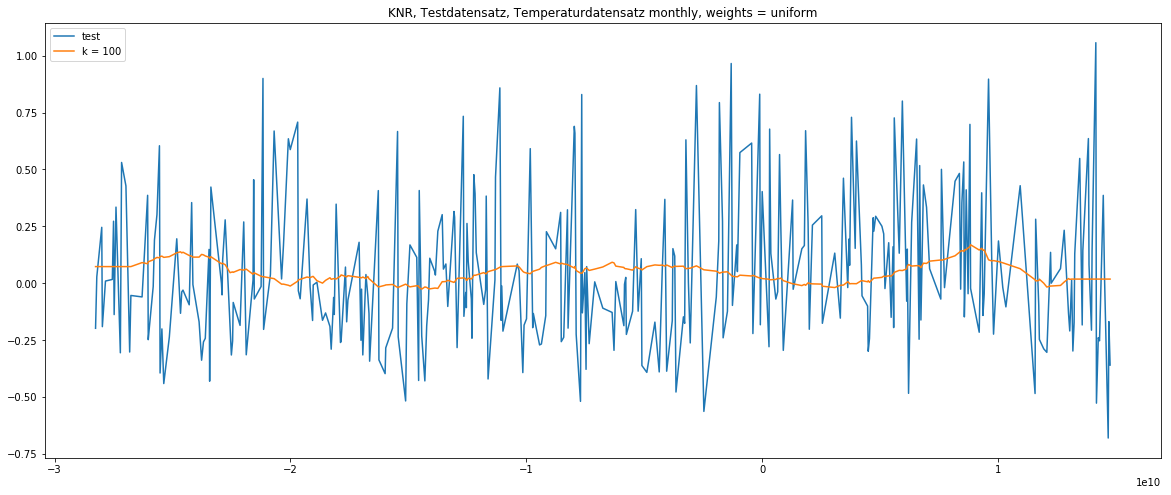

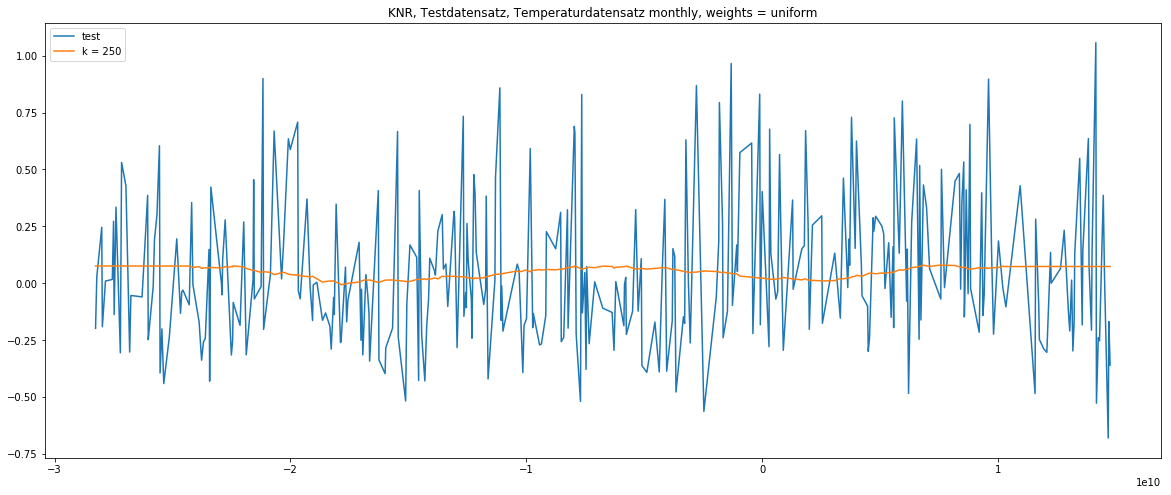

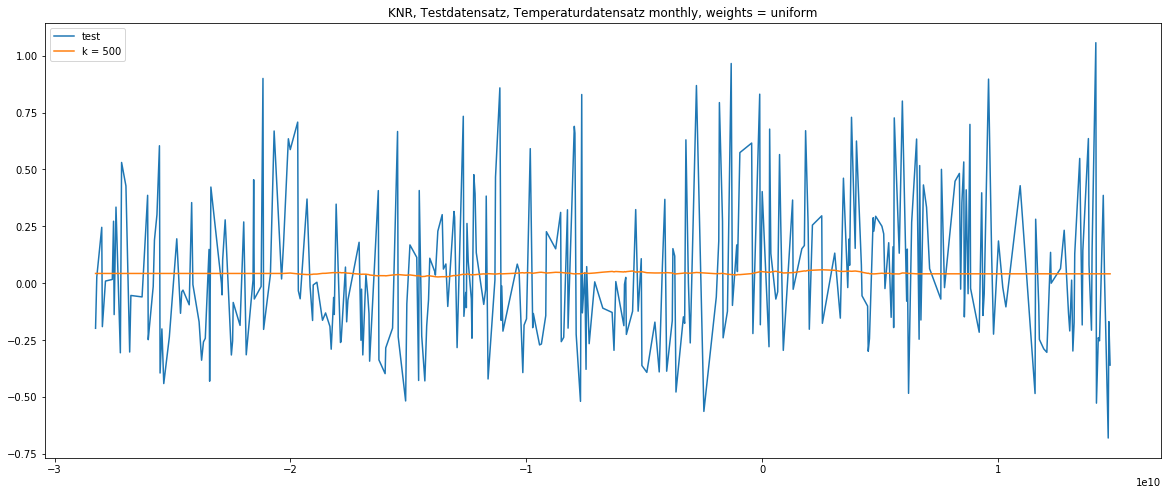

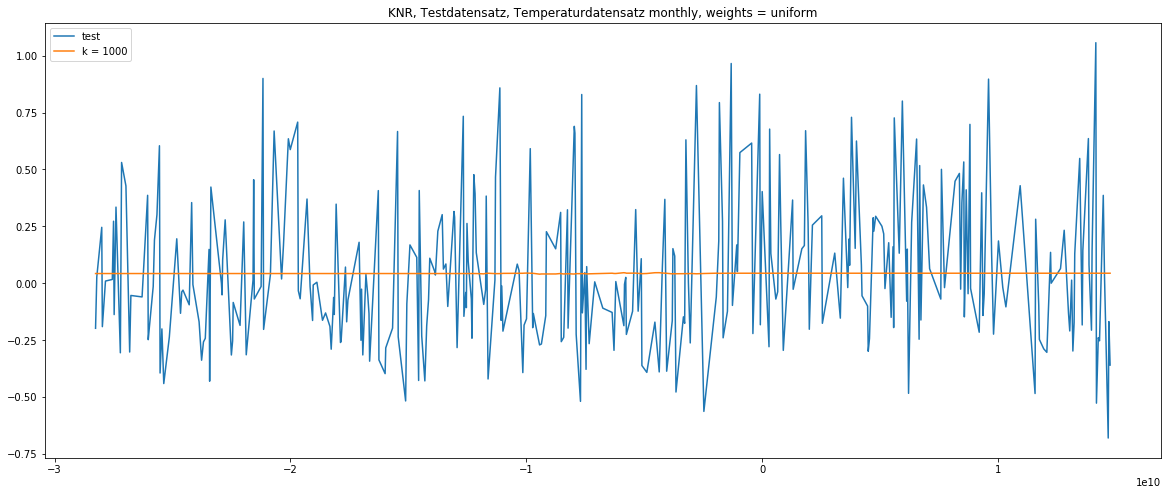

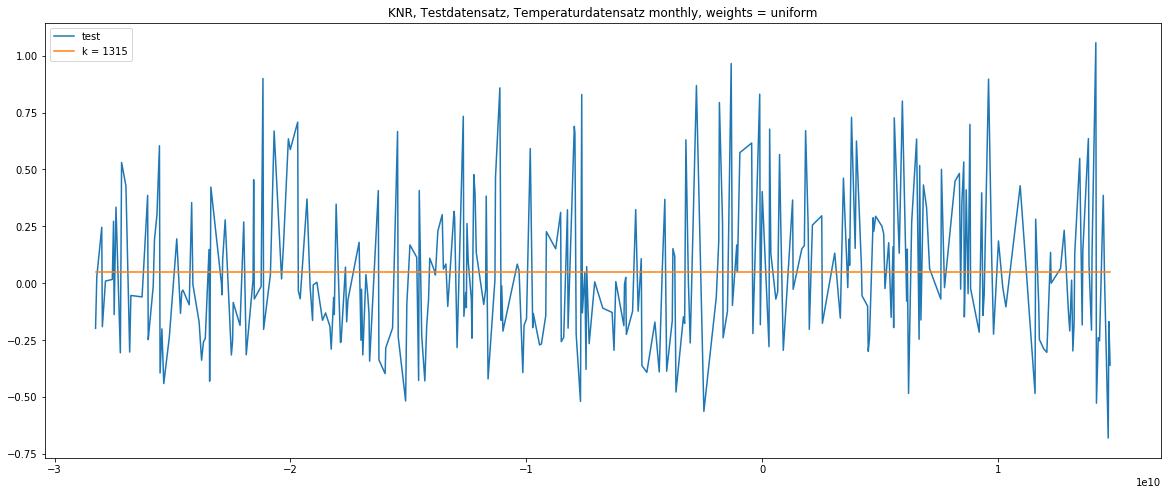

In [52]:
# for loop, um verschiedene k darzustellen
output_data_test = pd.DataFrame(x_test_sort)
k_range_train  = [1,10,25,50,100, 250, 500, 1000, 1315]

for k in k_range_train:
    # Fitten von KNR basierend auf Trainingsdaten
    knr_train = KNeighborsRegressor (n_neighbors= k, weights = "uniform", algorithm = "brute").fit(x_train_sort,y_train)
 
    #predicten von test
    output_data_test["k " + str(k)] = knr_train.predict(x_test_sort)  
    
    #Darstellung der Testdaten
    plt.figure(figsize =(20,8))
    plt.plot(x_test_sort, y_test, label = "test")
    plt.plot(x_test_sort, output_data_test["k " + str(k)], label = "k = " + str(k))
    plt.legend(loc="upper left")
    plt.title("KNR, Testdatensatz, Temperaturdatensatz monthly, weights = uniform")
    plt.show()

In [53]:
# for loop, um die verschiedenen Fehler und R2 für die verschiedenen k zu berechnen

# leere Listen erstellen, in welche die Daten der Fehlerberechnung im for loop angehängt werden können
rse_test_knr = []
rss_test_knr = []
r2_test_knr = []

for k in k_range_error:
    # fitten von KNR
    knr_train = KNeighborsRegressor (n_neighbors= k, weights = "uniform", algorithm = "brute").fit(x_train_sort,y_train)
    
    # prediction von y test
    y_predict_test = knr_train.predict(x_test_sort)
    
    # Berechnung der verschiedenen Fehler
    rse = abs(y_test - y_predict_test)
    rss = mean_squared_error(y_test, y_predict_test, sample_weight=None, multioutput="uniform_average")
    
    # Berechnung von R2
    r2 = r2_score(y_test, y_predict_test)
    
    rse_test_knr.append(rse)
    rss_test_knr.append(rss)
    r2_test_knr.append(r2)

In [54]:
# Darstellung der rss und r2 in einem DataFrame für Testdatensatz
rss_r2_test_knr = pd.DataFrame()
rss_r2_test_knr["k"] = k_range_error
rss_r2_test_knr["RSS Test KNR"] = rss_test_knr
rss_r2_test_knr["R2 Test KNR"] = r2_test_knr

rss_r2_test_knr

k  RSS Test KNR  R2 Test KNR
0     1      0.217316    -1.064002
1    10      0.117823    -0.119051
2    25      0.114830    -0.090620
3    50      0.108623    -0.031670
4   100      0.107367    -0.019737
5   250      0.106431    -0.010850
6   500      0.105240     0.000466
7  1000      0.105297    -0.000080
8  1315      0.105295    -0.000057

In [55]:
rss_r2_test_knr.max(0)

k               1315.000000
RSS Test KNR       0.217316
R2 Test KNR        0.000466
dtype: float64

In [57]:
# Ausgabe von rse_test_knr
rse_test_knr

[array([0.7057, 0.4797, 0.4773, 0.0084, 0.122 , 0.5226, 0.7783, 0.0469,
        0.678 , 0.5988, 0.5524, 0.1909, 0.1208, 0.6236, 0.7912, 0.4022,
        1.0363, 0.6872, 0.4251, 0.066 , 0.1011, 0.3222, 0.5677, 0.4122,
        0.9721, 0.1944, 0.4975, 0.0506, 0.1445, 0.3016, 0.2705, 0.8267,
        0.1153, 0.0393, 0.8737, 0.608 , 0.0554, 0.9245, 0.5064, 0.3463,
        0.2501, 0.3011, 0.2477, 0.3624, 0.1012, 0.3181, 0.2564, 0.4133,
        0.3157, 0.5984, 0.2164, 0.5347, 0.6264, 0.1023, 0.0801, 1.0109,
        0.0753, 0.2763, 0.3077, 0.1435, 0.4078, 0.6104, 0.7146, 1.0069,
        0.1339, 0.2817, 0.4177, 0.341 , 0.0136, 0.0631, 0.0228, 0.161 ,
        0.2438, 0.0555, 0.6951, 0.1038, 0.3911, 0.1232, 0.3902, 0.0999,
        0.1755, 0.8833, 0.3407, 0.5903, 0.1371, 0.1715, 0.4605, 0.0286,
        0.2605, 0.8209, 0.1028, 0.1514, 0.8635, 0.3602, 0.0342, 0.5981,
        0.8324, 0.5266, 1.0335, 0.0348, 0.3369, 0.3356, 0.9648, 0.1594,
        0.0531, 0.0254, 0.1591, 0.8417, 0.2153, 0.0168, 0.3642, 